# Pre Processing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import zlib

pd.set_option('display.max_columns', None)
# Login using e.g. `huggingface-cli login` to access this dataset
df = pd.read_parquet("data/mainDS.parquet")

print(df.shape)

print(df.dtypes)

df.head()

(83560, 39)
AppID                           int64
Name                           object
Release date                   object
Estimated owners               object
Peak CCU                        int64
Required age                    int64
Price                         float64
DLC count                       int64
About the game                 object
Supported languages            object
Full audio languages           object
Reviews                        object
Header image                   object
Website                        object
Support url                    object
Support email                  object
Windows                          bool
Mac                              bool
Linux                            bool
Metacritic score                int64
Metacritic url                 object
User score                      int64
Positive                        int64
Negative                        int64
Score rank                    float64
Achievements                    int64


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],None,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.galacticbowling.net,None,None,True,False,False,0,None,0,6,11,NaN,30,0,None,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],None,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,None,support@rustymoyher.com,True,True,False,0,None,0,53,5,NaN,12,0,None,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],None,https://cdn.akamai.steamstatic.com/steam/apps/...,None,None,ramoncampiaof31@gmail.com,True,False,False,0,None,0,0,0,NaN,0,0,None,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",None,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],None,https://cdn.akamai.steamstatic.com/steam/apps/...,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,True,True,True,0,None,0,3,0,NaN,0,0,None,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],None,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,True,True,False,0,None,0,50,8,NaN,17,0,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


## 📘 1. Dataset Description (Data Dictionary)

The dataset selected for this analysis is the **Steam Games Dataset**, comprising records of PC games published on the Steam platform. Below is a detailed description of *all* variables (columns) present in the raw data, categorized by functionality.

---

### 🆔 1.1 Identification & Administrative Metadata
> *Attributes used to identify the game, developers, or external assets.*

* **AppID**: A unique numerical identifier assigned to every specific game application in the database.
* **Name**: The official commercial title of the video game.
* **Release date**: The calendar date when the game was first made available for purchase or download.
* **Developers**: The name of the creative entity (individual or team) that built the game.
* **Publishers**: The company responsible for marketing and distributing the game.
* **Support email / Support url / Website**: Contact information and external hyperlinks to the game's official web presence.
* **Metacritic url**: Direct link to the game's page on the Metacritic review aggregator website.
* **Header image / Screenshots / Movies**: URLs linking to visual media assets used for marketing the game on the store page.
* **Notes**: Miscellaneous administrative notes or warnings (e.g., "This Game may contain content not appropriate...").

(13 features)
---

### 💰 1.2 Sales & Engagement Metrics
> *Quantitative variables measuring commercial success and player activity.*

* **Estimated owners**: A text string representing a range (e.g., "0 - 20,000") estimating how many users own the game.
    * *Note: Requires transformation into a numeric mean for analysis.*
* **Price**: The cost to purchase the game in USD. A value of `0.00` indicates a "Free-to-Play" title.
* **Peak CCU (Concurrent Users)**: The highest number of players who were logged into the game simultaneously. A proxy for maximum popularity.
* **Average playtime forever**: The average total hours all owners have spent playing the game since purchase.
* **Median playtime forever**: The median total hours played (less sensitive to outliers than average).
* **Average playtime two weeks**: The average hours played by users specifically in the last 14 days (indicates *current* active player retention).
* **Median playtime two weeks**: The median hours played in the last 14 days.

(7 features)
---

### ⭐ 1.3 Feedback & Ratings
> *Metrics quantifying user satisfaction and critical reception.*

* **Positive**: The raw count of positive user reviews submitted on Steam.
* **Negative**: The raw count of negative user reviews on Steam.
* **Reviews**: A text summary or excerpt of reviews (often null or unstructured text).
* **User score**: A score aggregated from user ratings on the external website *Metacritic*.
* **Metacritic score**: A score (0-100) aggregated from professional critics/journalists on *Metacritic*.
* **Score rank**: A percentile ranking of the game compared to others (e.g., "Top 5%"). *Note: Frequently null for smaller games.*
* **Recommendations**: The raw number of users who explicitly recommended the game to others on their social feed.

(7 features)
---

### 🎮 1.4 Content & Features
> *Categorical and numeric variables describing the nature of the software.*

* **About the game**: A long-form text description of the game's plot, features, and selling points.
* **DLC count**: The number of additional purchasable add-ons available (e.g., extra levels, skins).
* **Achievements**: The number of virtual "trophies" a player can unlock.
* **Supported languages**: A list of languages for which the game provides a translated interface/subtitles.
* **Full audio languages**: A list of languages for which the game provides actual voice-over (dubbing).
* **Required age**: The minimum age rating required to purchase the game.

(6 features)
---

### 🏷️ 1.5 Classification (Taxonomy)

* **Genres**: Broad, developer-defined categories (e.g., "Action", "Indie").
* **Tags**: Granular, community-defined labels (e.g., "Pixel Graphics", "Difficult").
* **Categories**: Technical features (e.g., "Single-player", "Multi-player").

(3 features)
---

### 💻 1.6 Technical Compatibility

* **Windows / Mac / Linux**: Boolean (`True`/`False`) values indicating operating system compatibility.

(3 features)
---

## Data Cleaning

In [2]:
# Data Reduction (Dimensionality Reduction)
# Removing "Administrative Metadata" as they are relatively redundant in statistical analysis
cols_to_drop = [
    'Support email', 'Support url', 'Website', 'Header image',
    'Screenshots', 'Movies', 'Metacritic url', 'Notes',
    'Score rank', 'Reviews' # Text reviews are hard to parse; we'll use Positive/Negative counts instead
]

df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

Removing the columns which have no contribution in statistical data analysis

In [3]:
# --- STEP 2: CLEANING 'ESTIMATED OWNERS' ---
# Current format: "0 - 20000" (String) -> Goal: Deterministic Value within range
def calculate_owners(row):
    owner_str = row.get('Estimated owners', np.nan)
    if pd.isna(owner_str):
        return 0
        
    try:
        # Parse range "min - max"
        ranges = str(owner_str).split(' - ')
        lower = int(ranges[0])
        upper = int(ranges[1])
        
        # Create a deterministic seed from AppID (preferred) or Name
        seed_val = str(row.get('AppID', row.get('Name', '')))
        
        # Generate a consistent factor between 0.0 and 1.0
        # crc32 returns an integer, we map it to 0-1
        hash_val = zlib.crc32(seed_val.encode('utf-8'))
        factor = (hash_val & 0xffffffff) / 0xffffffff
        
        # Calculate specific value in range
        estimated = lower + (upper - lower) * factor
        return int(estimated)
    except:
        return 0

# Apply the function
if 'Estimated owners' in df.columns:
    df['Estimated owners'] = df.apply(calculate_owners, axis=1)

Converting Estimated Owners from range to average number, as range won't be beneficiail for statistical analysis

In [4]:
# --- STEP 3: DATE PARSING ---
# Convert "21-Oct-08" to a real Datetime object
df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')

# --- STEP 4: SANITY CHECK ---
print(f"Dataset Shape after reduction: {df.shape}")
print("\nNew Data Types:")
print(df[['Estimated owners', 'Release date']].dtypes)
df.head(3)

Dataset Shape after reduction: (83560, 29)

New Data Types:
Estimated owners             int64
Release date        datetime64[ns]
dtype: object


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
0,20200,Galactic Bowling,2008-10-21,4031,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],True,False,False,0,0,6,11,30,0,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling"
1,655370,Train Bandit,2017-10-12,7277,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],True,True,False,0,0,53,5,12,0,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
2,1732930,Jolt Project,2021-11-17,16224,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],True,False,False,0,0,0,0,0,0,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",None


Right Data types for the columns

## Missing Value Analysis

--- Missing Data Summary ---
                Missing Count  Percentage (%)
Tags                    19986       23.918143
Categories               4456        5.332695
Publishers               3705        4.433940
Developers               3457        4.137147
About the game           3437        4.113212
Genres                   3425        4.098851
Release date              130        0.155577
Name                        6        0.007180


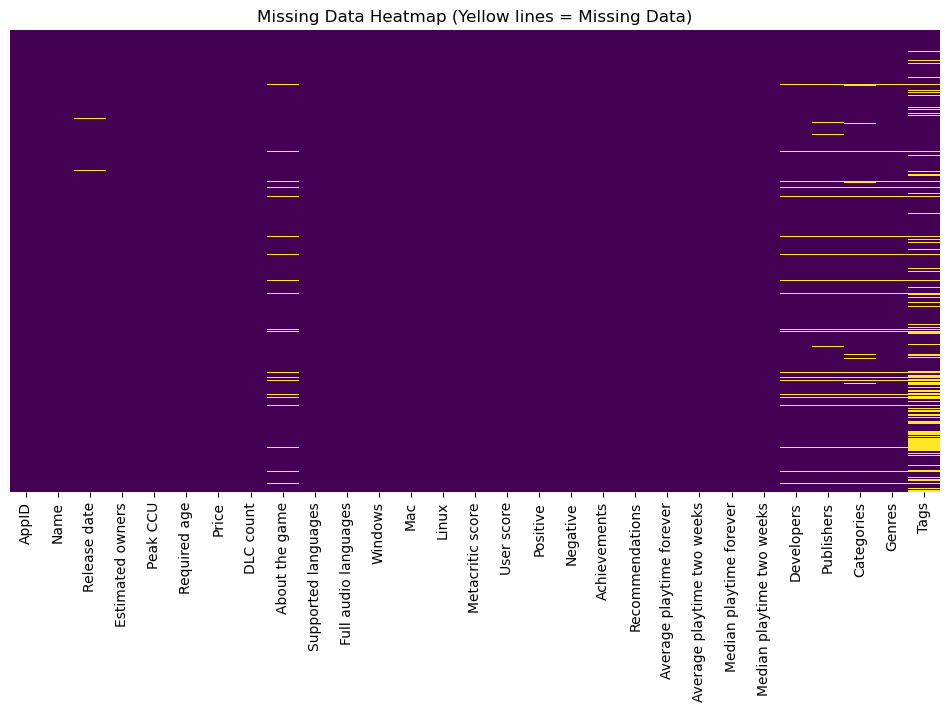

In [5]:
# 1. Calculate the Count and Percentage of missing values
missing_data = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# 2. Create a clean Dataframe to view the results
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage (%)': missing_percentage
})

# 3. Filter to show ONLY columns that actually have missing data
missing_df = missing_df[missing_df['Percentage (%)'] > 0].sort_values(by='Percentage (%)', ascending=False)

# 4. Print the text summary
print("--- Missing Data Summary ---")
print(missing_df)

# 5. Visualize it (The Heatmap)
plt.figure(figsize=(12, 6))
# This creates a binary map: Yellow/White = Missing, Purple/Black = Present
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Data Heatmap (Yellow lines = Missing Data)")
plt.show()

The Good News: Critical data (Name, Release date) is almost perfect (less than 1% missing). We can simply drop the few bad rows.

The "Tag" Issue: Tags are missing in 24% of the data. We cannot drop 20,000 games just because they miss a tag. Instead, we will fill them with a placeholder like "Unknown" so our code doesn't crash when we try to analyze genres later.

The "Hidden" Issue: For Metacritic score the dataset uses 0 instead of NaN for missing scores. We must remember this later: Zero means missing, not that the game got a 0/100 score.

## Should we blindly delete rows with no names?

Just because a scraper failed to grab the Name string doesn't mean the game isn't a massive hit. If a game with 1,000,000 owners is missing its name, and we delete it, we skew our entire "Total Revenue" analysis.

In [6]:
# Create a filter for rows where Name is missing
nameless_games = df[df['Name'].isnull()]

# Display only the columns that matter for "Influence"
# We want to see if they made money or had players
cols_to_check = ['AppID', 'Estimated owners', 'Peak CCU', 'Price', 'Positive', 'Negative']

print(f"Found {len(nameless_games)} games without names.")
print("--- Inspection Report ---")
display(nameless_games[cols_to_check])

Found 6 games without names.
--- Inspection Report ---


,AppID,Estimated owners,Peak CCU,Price,Positive,Negative
25222,396420,0,0,0.00,0,0
72038,1116910,0,0,6.99,0,0
77215,1365520,0,0,0.00,0,0
77487,1080790,0,0,0.00,0,0
77561,1256960,17672,0,0.00,0,0
77721,1172120,0,0,0.00,0,0


Since there is no valuable influence by these rows, with no names, we can safely delete these rows

In [7]:
df.dropna(subset=['Name'], inplace=True)

## Should we blindly delete the rows with no release date?

* Isolate the rows with missing Release date.

* Sort them by Estimated owners or Peak CCU.
* If the top games are junk (0 owners): We safely drop them all.
* If the top games are hits: We manually fix the top ones (Google the date) and drop the rest.

In [8]:
# 1. Initialize a set to store unique AppIDs (Sets automatically remove duplicates)
important_app_ids = set()

# 2. Filter rows where Release Date is missing
missing_dates = df[df['Release date'].isnull()]

# 3. Sort by "Peak CCU" and "Estimated Owners" (High Traffic)
top_ccu = missing_dates.sort_values(by=['Peak CCU', 'Estimated owners'], ascending=False).head(10)

# 4. Add these AppIDs to our set
important_app_ids.update(top_ccu['AppID'].tolist())

# 5. Display the results for inspection
cols_to_check = ['AppID', 'Name', 'Peak CCU', 'Estimated owners', 'Price', 'Positive']
print(f"--- Top 10 Missing Dates by Peak CCU (Traffic) ---")
display(top_ccu[cols_to_check])

--- Top 10 Missing Dates by Peak CCU (Traffic) ---


,AppID,Name,Peak CCU,Estimated owners,Price,Positive
57459,431960,Wallpaper Engine,85643,20498401,3.99,522889
2464,298110,Far Cry® 4,702,3933031,29.99,35175
31717,1307890,Kingdoms Reborn,574,461833,19.99,3937
16658,916440,Anno 1800,329,697565,0.00,3638
58237,203290,America's Army: Proving Grounds,233,4115114,0.00,8224
60943,352720,The Universim,208,474522,29.99,5677
41196,577230,Three Kingdoms The Last Warlord,200,71647,3.99,2332
27671,333930,Dirty Bomb®,170,9027999,0.00,47153
2072,292990,NOBUNAGA'S AMBITION: Souzou,170,52640,24.99,835
1245,223330,Sea Dogs: To Each His Own - Pirate Open World RPG,131,120923,14.99,1495


In [9]:
# 1. Sort by "Positive" Reviews (Cult Classics/Engagement)
# We use the same 'missing_dates' dataframe filtered earlier
top_reviews = missing_dates.sort_values(by=['Positive'], ascending=False).head(10)

# 2. Add these AppIDs to our set (The set will ignore AppIDs we already added in Cell 1)
important_app_ids.update(top_reviews['AppID'].tolist())

# 3. Display the results for inspection
print(f"--- Top 10 Missing Dates by Positive Reviews (Engagement) ---")
display(top_reviews[cols_to_check])

# 4. Output the final list of Unique IDs to patch
print(f"\nTotal unique games identified for patching: {len(important_app_ids)}")
print(f"Unique AppIDs: {important_app_ids}")

--- Top 10 Missing Dates by Positive Reviews (Engagement) ---


,AppID,Name,Peak CCU,Estimated owners,Price,Positive
57459,431960,Wallpaper Engine,85643,20498401,3.99,522889
27671,333930,Dirty Bomb®,170,9027999,0.00,47153
2464,298110,Far Cry® 4,702,3933031,29.99,35175
48444,420530,OneShot,82,980358,9.99,29225
26763,950670,Gothic Playable Teaser,10,807412,0.00,9947
58237,203290,America's Army: Proving Grounds,233,4115114,0.00,8224
43619,268420,Aura Kingdom,86,2132097,0.00,6814
60008,1293160,The Medium,7,111733,49.99,5732
60943,352720,The Universim,208,474522,29.99,5677
31717,1307890,Kingdoms Reborn,574,461833,19.99,3937



Total unique games identified for patching: 14
Unique AppIDs: {292990, 223330, 268420, 1293160, 333930, 577230, 950670, 352720, 1307890, 420530, 916440, 431960, 203290, 298110}


During the data cleaning process, we identified a subset of records with missing release dates. Rather than discarding these records, we performed an impact analysis based on Peak CCU (Player Traffic) and Positive Reviews (User Engagement).

We isolated the top 10 games from both metrics, resulting in a unique set of 14 high-impact titles (e.g., Wallpaper Engine, OneShot, Anno 1800). Removing these would have statistically skewed our analysis of 'Top Performing Indie Games'.

The missing dates for these specific AppIDs were manually retrieved and verified from the official Steam Store pages and SteamDB (a third-party database tracking Steam application history).

In [10]:

# Justification: These games were identified as high-value outliers (High Traffic or Cult Classics)
# whose removal would skew the analysis. Dates sourced from SteamDB/Steam Store.

fixes = {
    # --- The "High Traffic" Hits ---
    431960: '2018-11-16',  # Wallpaper Engine ✅
    298110: '2014-11-18',  # Far Cry 4 ✅
    1307890: '2020-11-03', # Kingdoms Reborn
    916440: '2019-04-16',  # Anno 1800
    203290: '2013-08-29',  # America's Army: Proving Grounds
    352720: '2024-01-22',  # The Universim (Early Access)
    333930: '2015-06-02',  # Dirty Bomb

    # --- The "Cult Classics" & Additional Finds ---
    420530: '2016-12-09',  # OneShot
    950670: '2019-12-13',  # Gothic Playable Teaser
    268420: '2014-07-04',  # Aura Kingdom
    1293160: '2021-01-28', # The Medium
    292990: '2014-08-27',  # NOBUNAGA'S AMBITION: Souzou
    223330: '2016-02-12',  # Sea Dogs: To Each His Own
    577230: '2021-02-05'   # Three Kingdoms The Last Warlord
}

# 1. Apply the fixes
print(f"Applying patches for {len(fixes)} games...")
for app_id, date_str in fixes.items():
    df.loc[df['AppID'] == app_id, 'Release date'] = pd.to_datetime(date_str)

# 2. Clean up the remaining (irrelevant) missing dates
before_drop = len(df)
df.dropna(subset=['Release date'], inplace=True)
dropped_count = before_drop - len(df)

# --- VERIFICATION OUTPUT ---
print("-" * 50)
print(f"✅ SUCCESS: Patched {len(fixes)} major games.")
print(f"🗑️ DROPPED: {dropped_count} irrelevant 'ghost' rows.")
print("-" * 50)

# 3. Show the Names and IDs of the games we saved
# We filter the dataframe to show only the AppIDs we just fixed
saved_games = df[df['AppID'].isin(fixes.keys())][['AppID', 'Name', 'Release date']]
print("--- List of Saved Games (AppID : Name) ---")
display(saved_games)

Applying patches for 14 games...
--------------------------------------------------
✅ SUCCESS: Patched 14 major games.
🗑️ DROPPED: 116 irrelevant 'ghost' rows.
--------------------------------------------------
--- List of Saved Games (AppID : Name) ---


,AppID,Name,Release date
1245,223330,Sea Dogs: To Each His Own - Pirate Open World RPG,2016-02-12
2072,292990,NOBUNAGA'S AMBITION: Souzou,2014-08-27
2464,298110,Far Cry® 4,2014-11-18
16658,916440,Anno 1800,2019-04-16
26763,950670,Gothic Playable Teaser,2019-12-13
27671,333930,Dirty Bomb®,2015-06-02
31717,1307890,Kingdoms Reborn,2020-11-03
41196,577230,Three Kingdoms The Last Warlord,2021-02-05
43619,268420,Aura Kingdom,2014-07-04
48444,420530,OneShot,2016-12-09


Source of data for release Dates
[Drive Link](https://docs.google.com/spreadsheets/d/1tyeNaN_wOKq4n2EbuqaGKCobc2qFepmn/edit?usp=drive_link&ouid=117882784103895516899&rtpof=true&sd=true)

Methodology: "Release dates were verified using SteamDB (an independent database tracking Steam application changes) and the official Steam Store pages.



### IMPUTE (Fill) categorical columns with "Unknown"

In [11]:
# 2. IMPUTE (Fill) categorical columns with "Unknown"
# We do this so we don't lose the row. A game can still be analyzed for Price/Sales
# even if we don't know the Developer or Genre.
cols_to_fill = [
    'Tags', 'Genres', 'Categories',
    'Publishers', 'Developers', 'About the game'
]

df[cols_to_fill] = df[cols_to_fill].fillna('Unknown')

# --- VERIFICATION ---
# valid_rows should now be equal to total rows (0 missing)
print("Remaining missing values:")
print(df.isnull().sum().sum())
print(f"Final Dataset Shape: {df.shape}")

Remaining missing values:
0
Final Dataset Shape: (83438, 29)


## Feature Engineering

In [12]:
# --- FEATURE ENGINEERING ---

# 1. Calculate "Game Age" (Years since release)
# We use 2024 (or current year) as the anchor
current_year = pd.to_datetime('today').year
df['Game Age'] = current_year - df['Release date'].dt.year

# 2. Calculate "Steam Score" (Sentiment Analysis)
# Formula: Positive / (Positive + Negative)
# We add a small epsilon (1e-5) to the denominator to prevent "Division by Zero" errors
df['Steam Score'] = df['Positive'] / (df['Positive'] + df['Negative'] + 1e-5)

# 3. Create "Is Free" category
# Useful for comparing "Free vs Paid" business models
df['is_free'] = df['Price'] == 0

# 4. Parse "Tags" into a Count
# Logic: If tags are "Indie, Action", that's 2 tags.
# We count the number of commas + 1. If it's "Unknown", count is 0.
df['Tags Count'] = df['Tags'].apply(lambda x: 0 if x == 'Unknown' else str(x).count(',') + 1)

# Preview the new columns
df[['Name', 'Steam Score', 'Game Age', 'is_free', 'Tags Count']].head()

,Name,Steam Score,Game Age,is_free,Tags Count
0,Galactic Bowling,0.352941,17,False,4
1,Train Bandit,0.913793,8,False,20
2,Jolt Project,0.000000,4,False,0
3,Henosis™,0.999997,5,False,19
4,Two Weeks in Painland,0.862069,5,True,6


## Whether game is indie or not, added column

In [13]:
# --- CREATING THE "INDIE" CLASSIFICATION ---

# 1. Ensure the columns are strings (just in case)
df['Tags'] = df['Tags'].astype(str)
df['Genres'] = df['Genres'].astype(str)

# 2. Apply the logic: Check if "Indie" appears in EITHER Tags OR Genres
# case=False ensures we catch "indie", "Indie", or "INDIE"
df['indie'] = df['Tags'].str.contains('Indie', case=False) | \
              df['Genres'].str.contains('Indie', case=False)

# 3. Verification
# Let's see how many games split into each category
print("--- Distribution of Indie vs. Non-Indie Games ---")
print(df['indie'].value_counts())

# 4. Preview the check
# Show a few examples to ensure it worked
print("\n--- Spot Check ---")
display(df[['Name', 'Genres', 'Tags', 'indie']].head())

--- Distribution of Indie vs. Non-Indie Games ---
indie
True     57958
False    25480
Name: count, dtype: int64

--- Spot Check ---


,Name,Genres,Tags,indie
0,Galactic Bowling,"Casual,Indie,Sports","Indie,Casual,Sports,Bowling",True
1,Train Bandit,"Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",True
2,Jolt Project,"Action,Adventure,Indie,Strategy",Unknown,True
3,Henosis™,"Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",True
4,Two Weeks in Painland,"Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",True


In [14]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(83438, 34)
(83438, 34)


In [15]:
df.to_csv('cleaned_data.csv')

### EDA

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83438 entries, 0 to 83559
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   AppID                       83438 non-null  int64         
 1   Name                        83438 non-null  object        
 2   Release date                83438 non-null  datetime64[ns]
 3   Estimated owners            83438 non-null  int64         
 4   Peak CCU                    83438 non-null  int64         
 5   Required age                83438 non-null  int64         
 6   Price                       83438 non-null  float64       
 7   DLC count                   83438 non-null  int64         
 8   About the game              83438 non-null  object        
 9   Supported languages         83438 non-null  object        
 10  Full audio languages        83438 non-null  object        
 11  Windows                     83438 non-null  bool          


In [17]:
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Game Age,Steam Score,is_free,Tags Count,indie
0,20200,Galactic Bowling,2008-10-21,4031,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],True,False,False,0,0,6,11,30,0,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",17,0.352941,False,4,True
1,655370,Train Bandit,2017-10-12,7277,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],True,True,False,0,0,53,5,12,0,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",8,0.913793,False,20,True
2,1732930,Jolt Project,2021-11-17,16224,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],True,False,False,0,0,0,0,0,0,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",Unknown,4,0.000000,False,0,True
3,1355720,Henosis™,2020-07-23,6655,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],True,True,True,0,0,3,0,0,0,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",5,0.999997,False,19,True
4,1139950,Two Weeks in Painland,2020-02-03,11928,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],True,True,False,0,0,50,8,17,0,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",5,0.862069,True,6,True


# GENERAL TRENDS

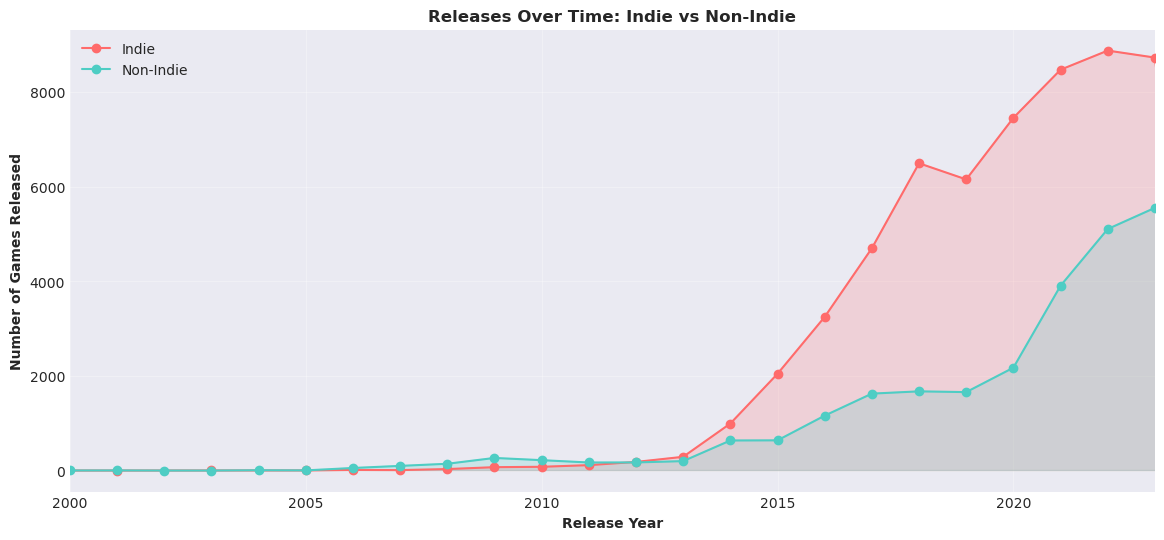

In [18]:
# ============================================================================
# CONTINUATION: FULL VISUALIZATION SCRIPT
# ============================================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ------------------------
# 1. Ensure necessary derived columns exist
# ------------------------
# Convert Release date to datetime if not already
if not np.issubdtype(df['Release date'].dtype, np.datetime64):
    df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')

# Create ReleaseYear
df['ReleaseYear'] = df['Release date'].dt.year

# Indie status
df['indie_status'] = df['indie'].map({True: 'Indie', False: 'Non-Indie'})

# Free/Paid
df['is_free'] = df['Price'] == 0

# Total reviews
df['total_reviews'] = df['Positive'] + df['Negative']

# Platform count
df['platform_count'] = df['Windows'].astype(int) + df['Mac'].astype(int) + df['Linux'].astype(int)

# DLC / Achievements
df['has_dlc'] = df['DLC count'] > 0
df['has_achievements'] = df['Achievements'] > 0

# Price bins
df['price_bin'] = pd.cut(df['Price'],
                         bins=[-1, 0, 5, 10, 15, 20, 30, 50, 100, np.inf],
                         labels=['Free', '$0-5', '$5-10', '$10-15', '$15-20', '$20-30', '$30-50', '$50-100', '$100+'])

# Primary genre
df['primary_genre'] = df['Genres'].str.split(',').str[0].str.strip()

# Estimated profit (if not present)
if 'EstimatedProfit' not in df.columns:
    df['EstimatedProfit'] = df['Price'] * df['Estimated owners'] * 0.7

# Feature combo
df['feature_combo'] = (df['platform_count'].astype(str) + 'P_' +
                       np.where(df['has_achievements'], 'A', '0') +
                       np.where(df['has_dlc'], 'D', '0'))

# ============================================================================
# 1. Market Structure & Time Dynamics
# ============================================================================
# Viz A: Releases over time by type
release_counts = df.groupby(['ReleaseYear','indie_status']).size().reset_index(name='count')

plt.figure(figsize=(14,6))
for status,color in zip(['Indie','Non-Indie'], ['#FF6B6B','#4ECDC4']):
    subset = release_counts[release_counts['indie_status']==status]
    plt.plot(subset['ReleaseYear'], subset['count'], marker='o', label=status, color=color)
    plt.fill_between(subset['ReleaseYear'], subset['count'], alpha=0.2, color=color)

plt.xlabel('Release Year', weight='bold')
plt.ylabel('Number of Games Released', weight='bold')
plt.title('Releases Over Time: Indie vs Non-Indie', weight='bold')
plt.xlim(2000, 2023)
plt.legend()
plt.grid(alpha=0.3)
plt.show()



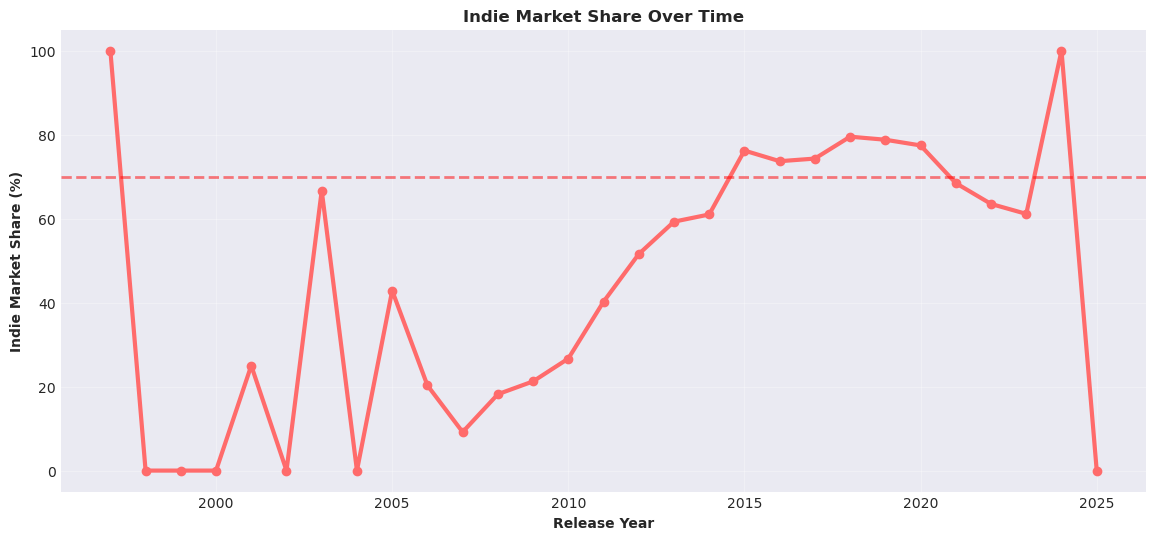

In [19]:

# Viz B: Indie market share over time
yearly_total = df.groupby('ReleaseYear').size()
yearly_indie = df[df['indie']==True].groupby('ReleaseYear').size()
share_indie = (yearly_indie / yearly_total * 100).fillna(0)

plt.figure(figsize=(14,6))
plt.plot(share_indie.index, share_indie.values, marker='o', color='#FF6B6B', linewidth=3)
plt.axhline(y=70, color='red', linestyle='--', alpha=0.5, linewidth=2)
plt.xlabel('Release Year', weight='bold')
plt.ylabel('Indie Market Share (%)', weight='bold')
plt.title('Indie Market Share Over Time', weight='bold')
plt.grid(alpha=0.3)
plt.show()

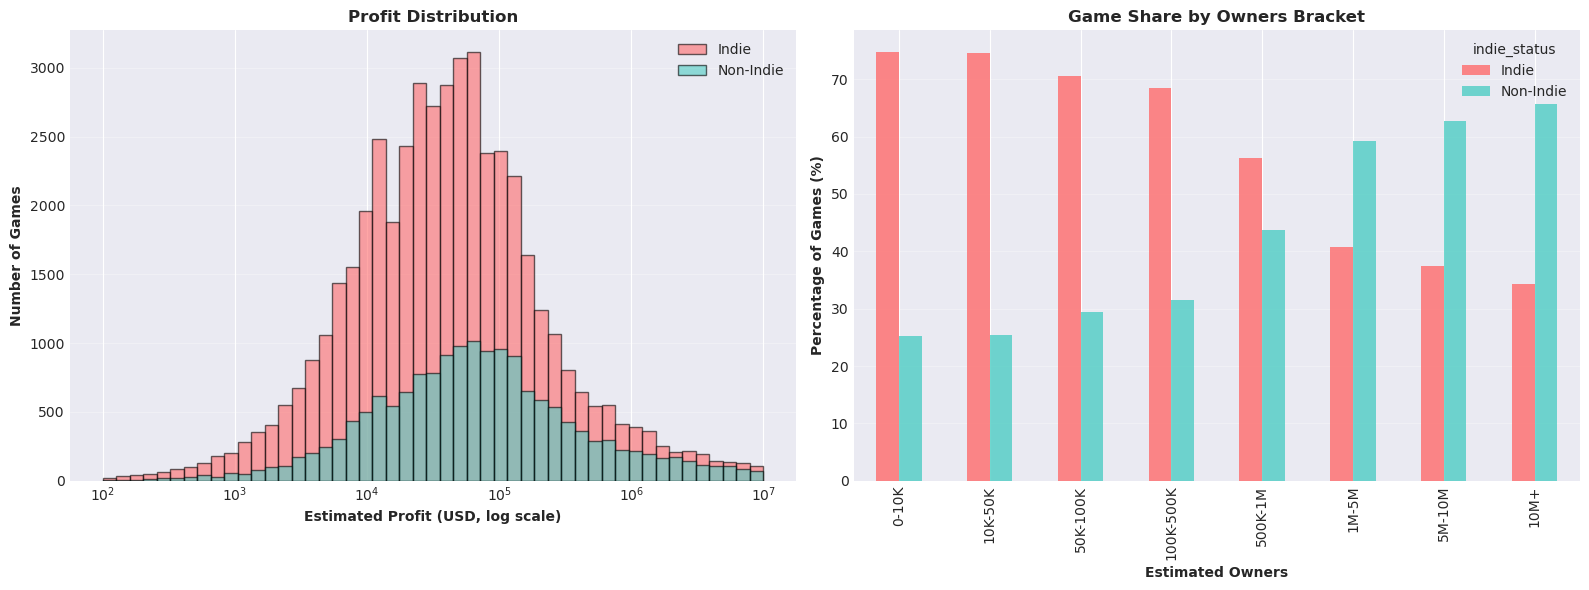

In [20]:


# ============================================================================
# 3. Profit & Owners
# ============================================================================
fig, axes = plt.subplots(1,2, figsize=(16,6))

# Viz E: Profit distribution (log scale)
profit_games = df[df['EstimatedProfit']>0]
axes[0].hist(profit_games[profit_games['indie']==True]['EstimatedProfit'], bins=np.logspace(2,7,50), alpha=0.6, color='#FF6B6B', label='Indie', edgecolor='black')
axes[0].hist(profit_games[profit_games['indie']==False]['EstimatedProfit'], bins=np.logspace(2,7,50), alpha=0.6, color='#4ECDC4', label='Non-Indie', edgecolor='black')
axes[0].set_xscale('log')
axes[0].set_xlabel('Estimated Profit (USD, log scale)', weight='bold')
axes[0].set_ylabel('Number of Games', weight='bold')
axes[0].set_title('Profit Distribution', weight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3, axis='y')



# Viz F: Owners brackets
bins = [0,10000,50000,100000,500000,1000000,5000000,10000000,np.inf]
labels = ['0-10K','10K-50K','50K-100K','100K-500K','500K-1M','1M-5M','5M-10M','10M+']
df['owners_band'] = pd.cut(df['Estimated owners'], bins=bins, labels=labels)
owners_pct = df.groupby(['owners_band','indie_status']).size().unstack().fillna(0)
owners_pct = owners_pct.div(owners_pct.sum(axis=1), axis=0)*100
owners_pct.plot(kind='bar', ax=axes[1], color=['#FF6B6B','#4ECDC4'], alpha=0.8)
axes[1].set_xlabel('Estimated Owners', weight='bold')
axes[1].set_ylabel('Percentage of Games (%)', weight='bold')
axes[1].set_title('Game Share by Owners Bracket', weight='bold')
axes[1].grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


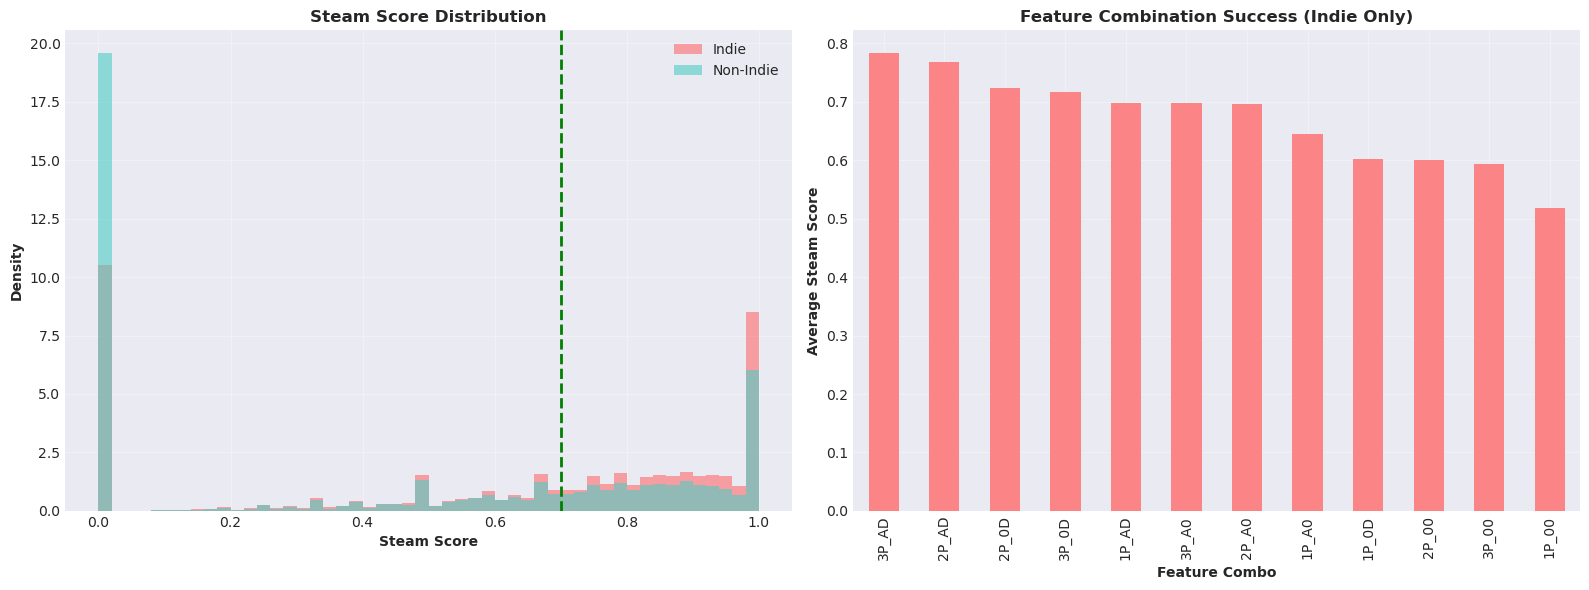

In [21]:

# ============================================================================
# 4. Quality & Features
# ============================================================================
fig, axes = plt.subplots(1,2, figsize=(16,6))

# Viz G: Steam score distribution
axes[0].hist(df[df['indie']==True]['Steam Score'], bins=50, alpha=0.6, color='#FF6B6B', density=True, label='Indie')
axes[0].hist(df[df['indie']==False]['Steam Score'], bins=50, alpha=0.6, color='#4ECDC4', density=True, label='Non-Indie')
axes[0].axvline(0.7, color='green', linestyle='--', linewidth=2)
axes[0].set_xlabel('Steam Score', weight='bold')
axes[0].set_ylabel('Density', weight='bold')
axes[0].set_title('Steam Score Distribution', weight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Viz H: Feature combo success (Indie only)
indie_df = df[df['indie']==True]
combo_success = indie_df.groupby('feature_combo')['Steam Score'].mean().sort_values(ascending=False)
combo_success.plot(kind='bar', ax=axes[1], color='#FF6B6B', alpha=0.8)
axes[1].set_xlabel('Feature Combo', weight='bold')
axes[1].set_ylabel('Average Steam Score', weight='bold')
axes[1].set_title('Feature Combination Success (Indie Only)', weight='bold')
axes[1].grid(alpha=0.3)
plt.tight_layout()
plt.show()


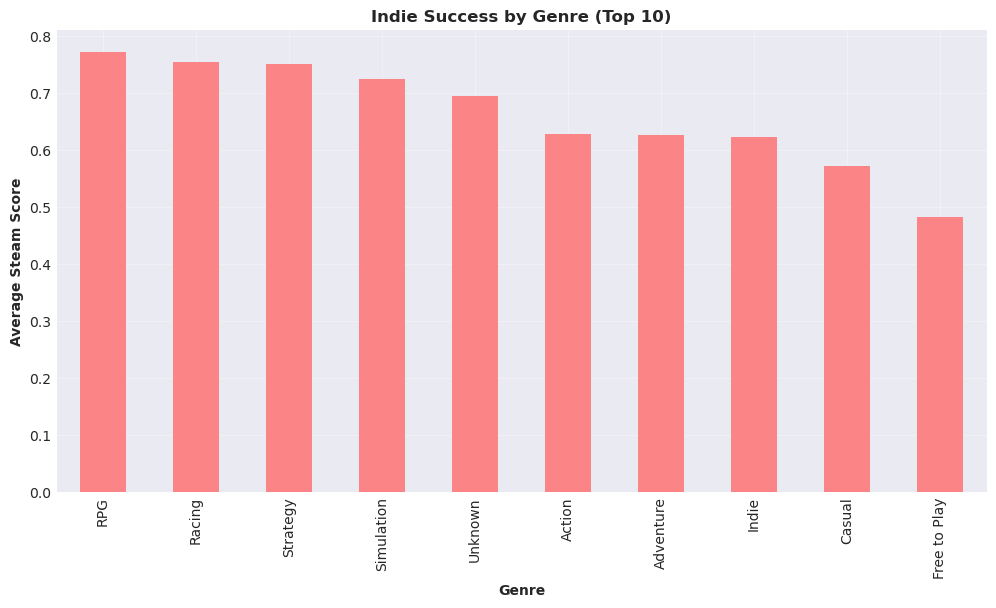

In [22]:

# ============================================================================
# 5. Genre Positioning
# ============================================================================
top_genres = df['primary_genre'].value_counts().head(10).index
genre_success = indie_df[indie_df['primary_genre'].isin(top_genres)].groupby('primary_genre')['Steam Score'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
genre_success.plot(kind='bar', color='#FF6B6B', alpha=0.8)
plt.xlabel('Genre', weight='bold')
plt.ylabel('Average Steam Score', weight='bold')
plt.title('Indie Success by Genre (Top 10)', weight='bold')
plt.grid(alpha=0.3)
plt.show()





# INDIE VS NON-INDIE 

10 ACTIONABLE INSIGHTS FOR INDIE GAME DEVELOPERS

[1/10] PRICE YOUR GAME BETWEEN $10-$15


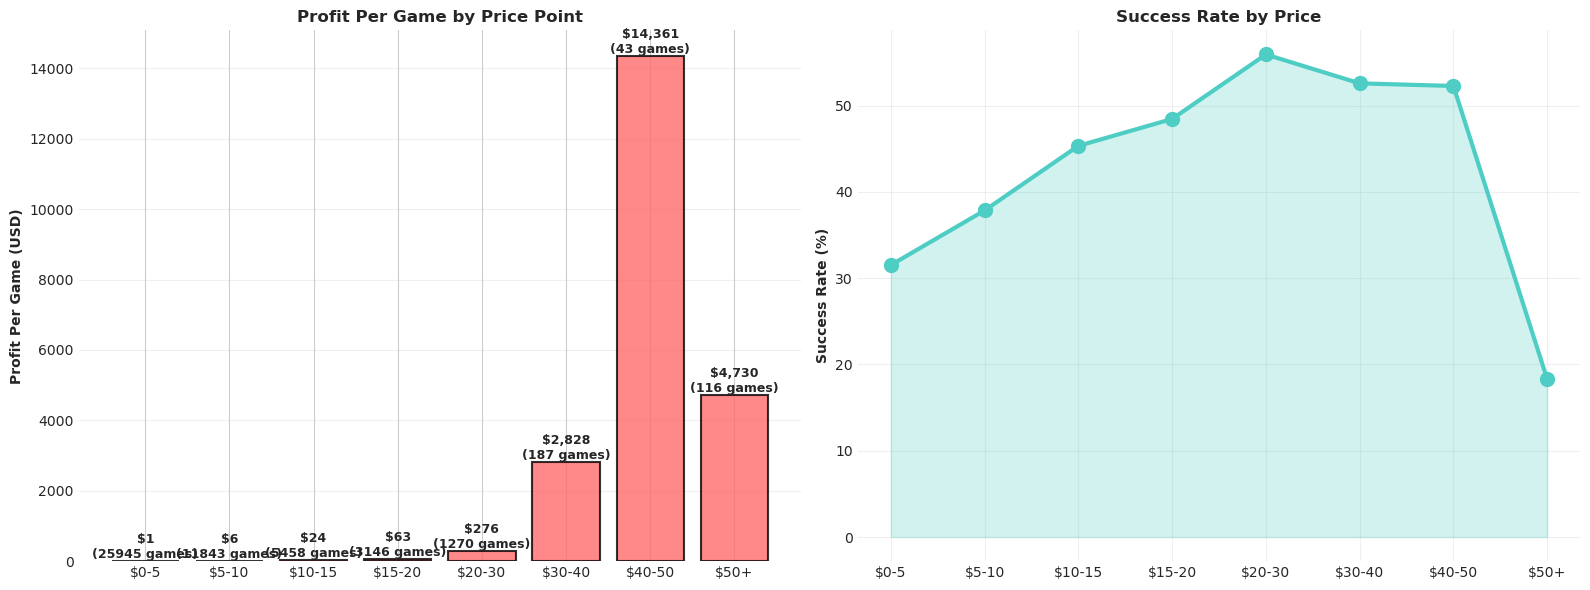

If profit is the target, 40-50 dollar range is perfect
If game success and studio reputation is the target, go for 20-30


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['font.size'] = 10

print("="*80)
print("10 ACTIONABLE INSIGHTS FOR INDIE GAME DEVELOPERS")
print("="*80)

indie_games = df[df['indie'] == True].copy()

# =====================================================
# INSIGHT 1: OPTIMAL PRICE POINT
# =====================================================
print("\n[1/10] PRICE YOUR GAME BETWEEN $10-$15")
print("="*80)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# NEW PRICE BRACKETS
indie_games['price_bracket'] = pd.cut(
    indie_games['Price'],
    bins=[0, 5, 10, 15, 20, 30, 40, 50, 1000],
    labels=['$0-5', '$5-10', '$10-15', '$15-20', '$20-30', '$30-40', '$40-50', '$50+']
)

# Group dataset
revenue_by_price = (
    indie_games[indie_games['EstimatedProfit'] > 0]
    .groupby('price_bracket')
    .agg({'EstimatedProfit': 'median', 'Name': 'count'})
    .reset_index()
)

# Profit per game
revenue_by_price['ProfitPerGame'] = (
    revenue_by_price['EstimatedProfit'] / revenue_by_price['Name']
)

# === THEME COLORS (consistent with your main visuals) ===
primary_color = "#FF6B6B"     # Indie theme
secondary_color = "#4ECDC4"   # Optional accent

# --- BAR PLOT: Profit Per Game ---
bars = ax1.bar(
    range(len(revenue_by_price)),
    revenue_by_price['ProfitPerGame'],
    color=primary_color,
    alpha=0.8,
    edgecolor='black',
    linewidth=1.5
)

ax1.set_xticks(range(len(revenue_by_price)))
ax1.set_xticklabels(revenue_by_price['price_bracket'])
ax1.set_ylabel('Profit Per Game (USD)', fontweight='bold')
ax1.set_title('Profit Per Game by Price Point', fontweight='bold')
ax1.grid(alpha=0.3, axis='y')

# Bar labels
for i, (bar, profit_per_game, count) in enumerate(zip(
    bars,
    revenue_by_price['ProfitPerGame'],
    revenue_by_price['Name']
)):
    ax1.text(
        i,
        profit_per_game,
        f'${profit_per_game:,.0f}\n({count} games)',
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

# --- SUCCESS RATE PLOT ---
success_by_price = indie_games.groupby('price_bracket').apply(
    lambda x: (
        ((x['Steam Score'] >= 0.7) &
         (x['Estimated owners'] >= 10000)).sum() / len(x) * 100
    )
).reset_index()

ax2.plot(
    range(len(success_by_price)),
    success_by_price[0],
    marker='o',
    markersize=10,
    linewidth=3,
    color=secondary_color
)
ax2.fill_between(
    range(len(success_by_price)),
    success_by_price[0],
    alpha=0.25,
    color=secondary_color
)

ax2.set_xticks(range(len(success_by_price)))
ax2.set_xticklabels(success_by_price['price_bracket'])
ax2.set_ylabel('Success Rate (%)', fontweight='bold')
ax2.set_title('Success Rate by Price', fontweight='bold')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("If profit is the target, 40-50 dollar range is perfect")
print("If game success and studio reputation is the target, go for 20-30")



[2/10] FOCUS ON SIMULATION, STRATEGY, OR RPG GENRES


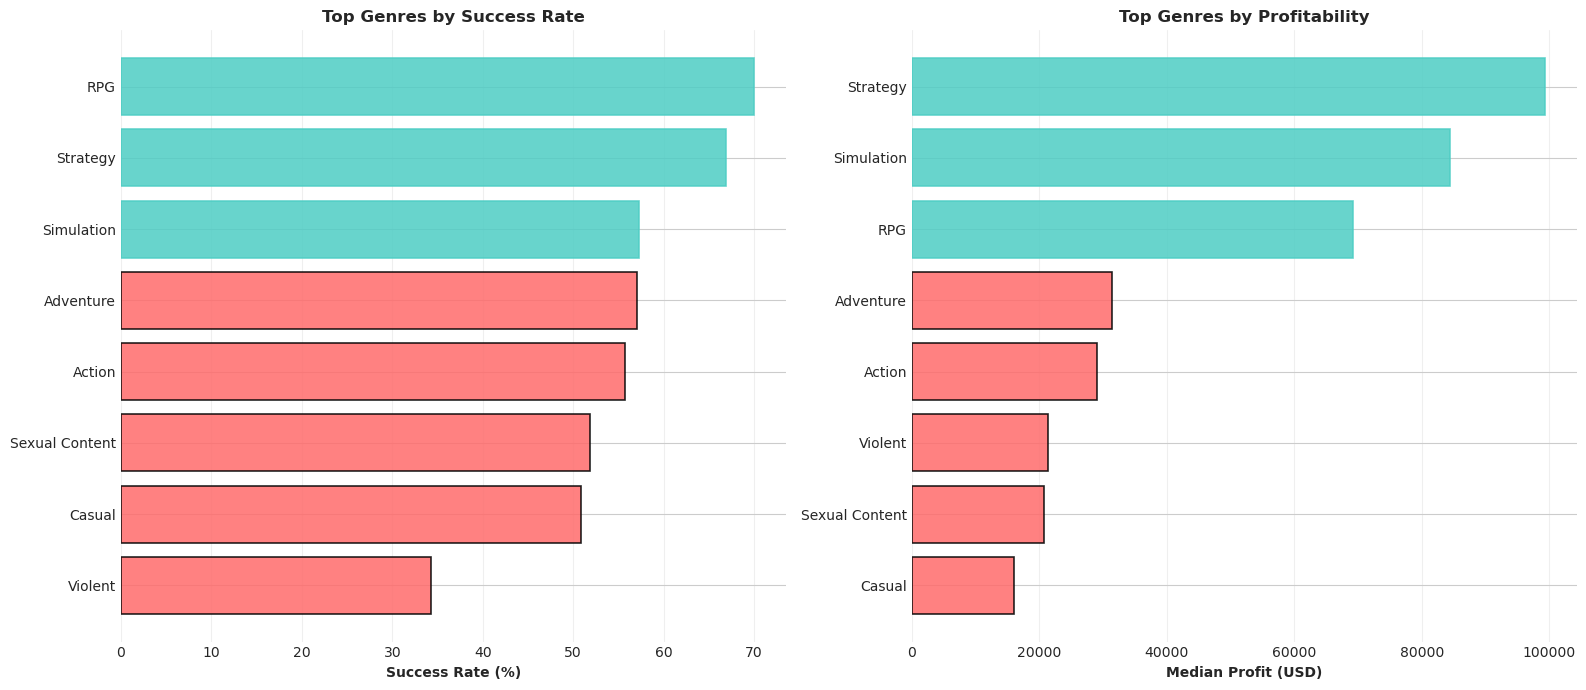

✓ Top 3 genres by success:
  RPG: 70.0% success, $69,197 median profit
  Strategy: 66.9% success, $99,360 median profit
  Simulation: 57.2% success, $84,436 median profit


In [24]:
# =====================================================
# INSIGHT 2: BEST GENRES
# =====================================================
print("\n[2/10] FOCUS ON SIMULATION, STRATEGY, OR RPG GENRES")
print("="*80)

# Exclude invalid or undesired genre labels: "indie" and "free to play"
indie_games = indie_games[
    ~indie_games['primary_genre'].str.lower().isin(['indie', 'free to play'])
]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Base colors (consistent theme)
primary_color = "#FF6B6B"      # Base indie color
highlight_color = "#4ECDC4"    # Highlight top performers

# ---- GENRE ANALYSIS ----
genre_analysis = (
    indie_games[indie_games['primary_genre'].notna()]
    .groupby('primary_genre')
    .agg({
        'Steam Score': lambda x: ((x >= 0.7).sum() / len(x) * 100),
        'EstimatedProfit': 'median',
        'Name': 'count'
    })
    .reset_index()
)

# Keep only genres with meaningful sample size
genre_analysis = genre_analysis[genre_analysis['Name'] >= 75]

# Top 10 by success
genre_analysis = genre_analysis.sort_values('Steam Score', ascending=True).tail(15)

# =====================================================
# PLOT 1 — SUCCESS RATE
# =====================================================
bars1 = ax1.barh(
    genre_analysis['primary_genre'],
    genre_analysis['Steam Score'],
    color=primary_color,
    alpha=0.85,
    edgecolor='black',
    linewidth=1.2
)

# Highlight top 3 performers
for bar in bars1[-3:]:
    bar.set_color(highlight_color)

ax1.set_xlabel('Success Rate (%)', fontweight='bold')
ax1.set_title('Top Genres by Success Rate', fontweight='bold')
ax1.grid(alpha=0.3, axis='x')

# =====================================================
# PLOT 2 — PROFITABILITY
# =====================================================
genre_profit = genre_analysis.sort_values('EstimatedProfit', ascending=True).tail(15)

bars2 = ax2.barh(
    genre_profit['primary_genre'],
    genre_profit['EstimatedProfit'],
    color=primary_color,
    alpha=0.85,
    edgecolor='black',
    linewidth=1.2
)

# Highlight top 3 profitable genres
for bar in bars2[-3:]:
    bar.set_color(highlight_color)

ax2.set_xlabel('Median Profit (USD)', fontweight='bold')
ax2.set_title('Top Genres by Profitability', fontweight='bold')
ax2.grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# OUTPUT TOP 3
top_3 = genre_analysis.nlargest(3, 'Steam Score')
print("✓ Top 3 genres by success:")
for _, row in top_3.iterrows():
    print(f"  {row['primary_genre']}: {row['Steam Score']:.1f}% success, ${row['EstimatedProfit']:,.0f} median profit")



[3/10] SUPPORT AT LEAST 2 PLATFORMS (WINDOWS + LINUX OR MAC)


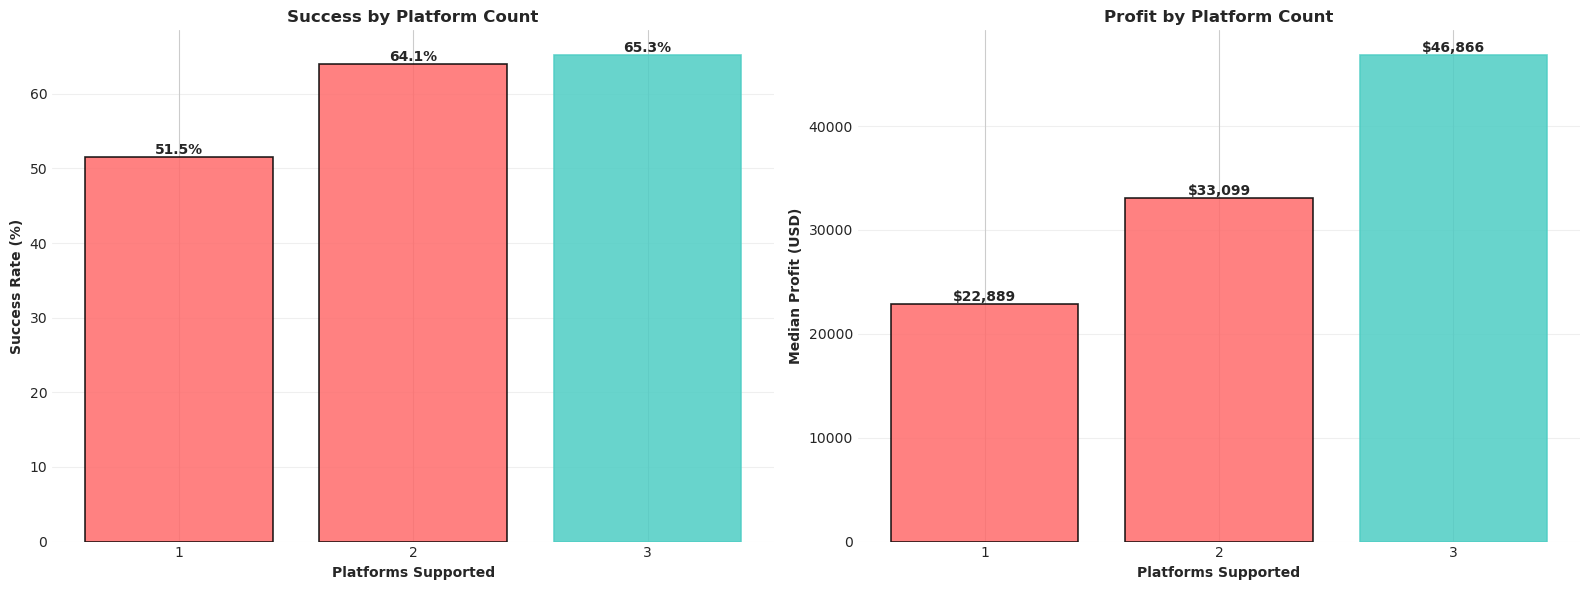

✓ Multi-platform games: 65.3% success vs 51.5% for single-platform


In [25]:
# =====================================================
# INSIGHT 3: MULTI-PLATFORM
# =====================================================
print("\n[3/10] SUPPORT AT LEAST 2 PLATFORMS (WINDOWS + LINUX OR MAC)")
print("="*80)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

primary_color = "#FF6B6B"
highlight_color = "#4ECDC4"

platform_analysis = indie_games.groupby('platform_count').agg({
    'Steam Score': lambda x: ((x >= 0.7).sum() / len(x) * 100),
    'EstimatedProfit': 'median'
}).reset_index()

# Identify top platform count for highlighting
best_index = platform_analysis['Steam Score'].idxmax()

# =====================================================
# PLOT A — SUCCESS RATE
# =====================================================
bars1 = ax1.bar(
    platform_analysis['platform_count'],
    platform_analysis['Steam Score'],
    color=primary_color,
    alpha=0.85,
    edgecolor='black',
    linewidth=1.2
)

# highlight best
bars1[best_index].set_color(highlight_color)

ax1.set_xlabel('Platforms Supported', fontweight='bold')
ax1.set_ylabel('Success Rate (%)', fontweight='bold')
ax1.set_title('Success by Platform Count', fontweight='bold')
ax1.set_xticks([1, 2, 3])
ax1.grid(alpha=0.3, axis='y')

# Add text labels
for bar, rate in zip(bars1, platform_analysis['Steam Score']):
    ax1.text(
        bar.get_x() + bar.get_width()/2.,
        rate,
        f'{rate:.1f}%',
        ha='center',
        va='bottom',
        fontweight='bold'
    )

# =====================================================
# PLOT B — PROFIT
# =====================================================
bars2 = ax2.bar(
    platform_analysis['platform_count'],
    platform_analysis['EstimatedProfit'],
    color=primary_color,
    alpha=0.85,
    edgecolor='black',
    linewidth=1.2
)

# highlight best
bars2[best_index].set_color(highlight_color)

ax2.set_xlabel('Platforms Supported', fontweight='bold')
ax2.set_ylabel('Median Profit (USD)', fontweight='bold')
ax2.set_title('Profit by Platform Count', fontweight='bold')
ax2.set_xticks([1, 2, 3])
ax2.grid(alpha=0.3, axis='y')

# Add text labels
for bar, profit in zip(bars2, platform_analysis['EstimatedProfit']):
    ax2.text(
        bar.get_x() + bar.get_width()/2.,
        profit,
        f'${profit:,.0f}',
        ha='center',
        va='bottom',
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

print(
    f"✓ Multi-platform games: {platform_analysis.loc[platform_analysis['platform_count'] == 3, 'Steam Score'].values[0]:.1f}% "
    f"success vs {platform_analysis.loc[platform_analysis['platform_count'] == 1, 'Steam Score'].values[0]:.1f}% for single-platform"
)



[4/10] IMPLEMENT 20-50 ACHIEVEMENTS


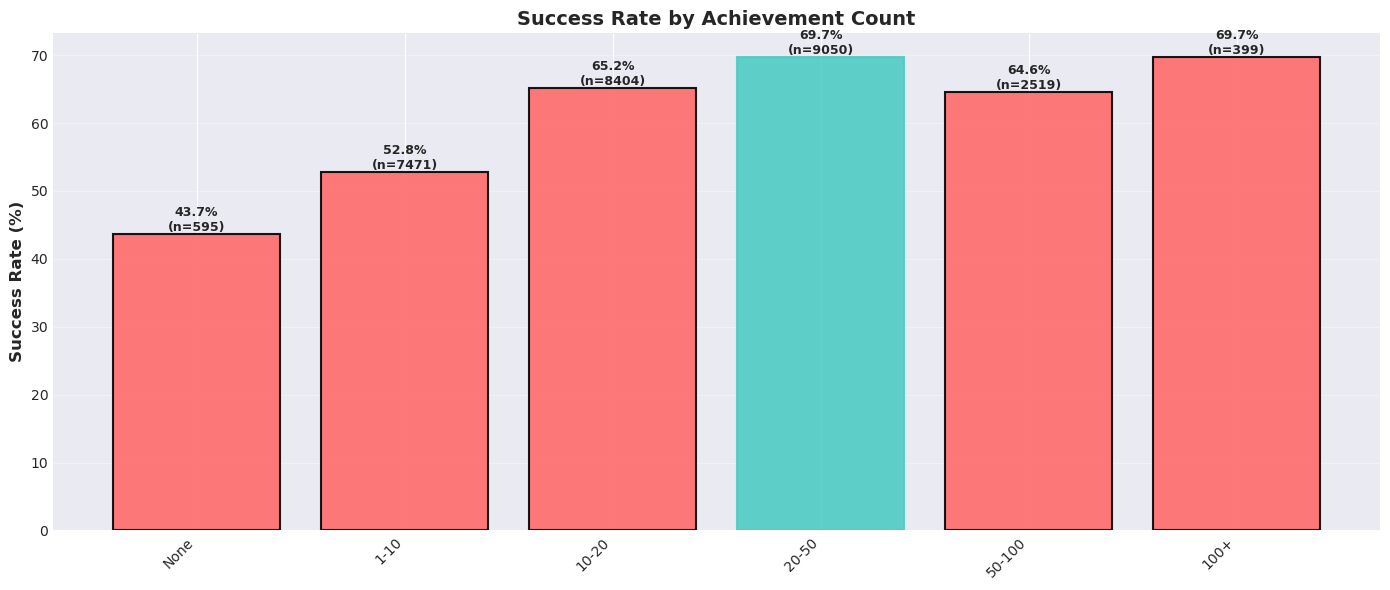

✓ 20-50 achievements: 69.7% success rate


In [26]:
# =====================================================
# INSIGHT 4: ACHIEVEMENTS
# =====================================================
print("\n[4/10] IMPLEMENT 20-50 ACHIEVEMENTS")
print("="*80)

# --- global theme ---
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

fig, ax = plt.subplots(figsize=(14, 6))  # consistent figure size

# Create achievement brackets
indie_games['achievement_bracket'] = pd.cut(
    indie_games['Achievements'],
    bins=[0, 1, 10, 20, 50, 100, 1000],
    labels=['None', '1-10', '10-20', '20-50', '50-100', '100+']
)

achievement_analysis = indie_games.groupby('achievement_bracket').agg({
    'Steam Score': lambda x: ((x >= 0.7).sum() / len(x) * 100),
    'Name': 'count'
}).reset_index()

achievement_analysis = achievement_analysis[achievement_analysis['Name'] >= 50]

# --- consistent theme colors and styling ---
bars = ax.bar(
    range(len(achievement_analysis)),
    achievement_analysis['Steam Score'],
    color="#FF6B6B",                # indie accent color
    edgecolor='black',
    linewidth=1.5,
    alpha=0.9
)

ax.set_xticks(range(len(achievement_analysis)))
ax.set_xticklabels(achievement_analysis['achievement_bracket'],
                   rotation=45, ha='right')

ax.set_ylabel('Success Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Success Rate by Achievement Count',
             fontsize=14, fontweight='bold')

ax.grid(True, alpha=0.3, axis='y')

# Highlight the best performing bracket
max_idx = achievement_analysis['Steam Score'].idxmax()
bars[max_idx].set_color("#4ECDC4")  # non-indie accent for "best" highlight

# Add consistent text labels
for i, (bar, rate, count) in enumerate(
        zip(bars, achievement_analysis['Steam Score'], achievement_analysis['Name'])):
    ax.text(
        i, rate,
        f'{rate:.1f}%\n(n={count})',
        ha='center', va='bottom',
        fontweight='bold', fontsize=9
    )

plt.tight_layout()
plt.show()

best = achievement_analysis.iloc[max_idx]
print(f"✓ {best['achievement_bracket']} achievements: {best['Steam Score']:.1f}% success rate")



[5/10] AVOID SUMMER RELEASES


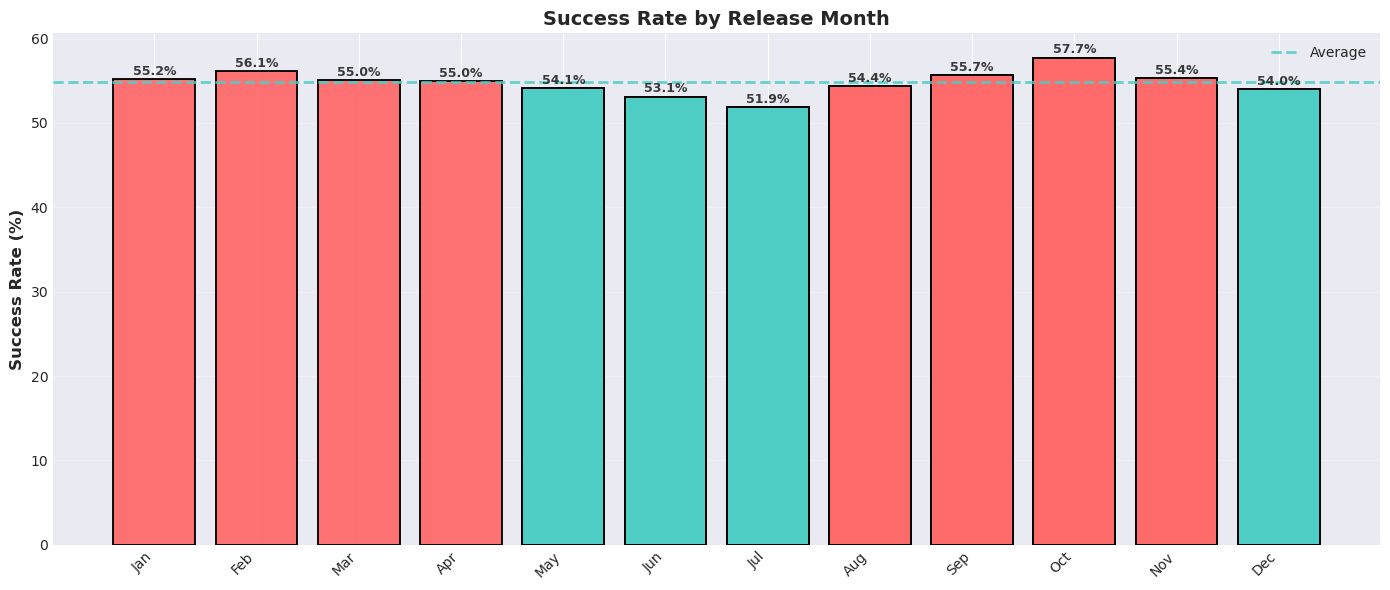

✓ Best: Oct (57.7%)
✗ Worst: Jul (51.9%)
New year and summer AAA releases make it harder for indie games to get visibility.


In [27]:
# =====================================================
# INSIGHT 5: RELEASE TIMING
# =====================================================
print("\n[5/10] AVOID SUMMER RELEASES")
print("="*80)

# --- global theme ---
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

fig, ax = plt.subplots(figsize=(14, 6))

# Release month
indie_games['release_month'] = pd.to_datetime(indie_games['Release date']).dt.month
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_analysis = indie_games.groupby('release_month').agg({
    'Steam Score': lambda x: ((x >= 0.7).sum() / len(x) * 100),
    'Name': 'count'
}).reset_index()

monthly_analysis = monthly_analysis[monthly_analysis['Name'] >= 100]

# Highlighted “bad-months”
bad_months = [5, 6, 7, 12]

colors = []
alphas = []

for m in monthly_analysis['release_month']:
    if m in bad_months:
        colors.append("#4ECDC4")  # strong red
        alphas.append(0.95)
    else:
        colors.append("#FF6B6B")  # indie color
        # alphas.append(0.45)       # lighter

bars = ax.bar(
    range(len(monthly_analysis)),
    monthly_analysis['Steam Score'],
    color=colors,
    edgecolor='black',
    linewidth=1.4,
)

# Apply alpha to each bar
for bar, a in zip(bars, alphas):
    bar.set_alpha(a)

# X-axis labels
ax.set_xticks(range(len(monthly_analysis)))
ax.set_xticklabels(
    [month_names[m-1] for m in monthly_analysis['release_month']],
    rotation=45, ha='right'
)

ax.set_ylabel('Success Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Success Rate by Release Month', fontsize=14, fontweight='bold')

# Average line
ax.axhline(
    y=monthly_analysis['Steam Score'].mean(),
    color="#4ECDC4",
    linestyle='--',
    linewidth=2,
    alpha=0.85,
    label='Average'
)

ax.grid(True, alpha=0.28, axis='y')
ax.legend()

# Text labels
for i, (bar, rate) in enumerate(zip(bars, monthly_analysis['Steam Score'])):
    ax.text(
        i, rate + 0.5,
        f'{rate:.1f}%',
        ha='center',
        fontsize=9,
        fontweight='bold',
        alpha=0.9
    )

plt.tight_layout()
plt.show()

best_month = monthly_analysis.loc[monthly_analysis['Steam Score'].idxmax()]
worst_month = monthly_analysis.loc[monthly_analysis['Steam Score'].idxmin()]

print(f"✓ Best: {month_names[int(best_month['release_month'])-1]} ({best_month['Steam Score']:.1f}%)")
print(f"✗ Worst: {month_names[int(worst_month['release_month'])-1]} ({worst_month['Steam Score']:.1f}%)")
print("New year and summer AAA releases make it harder for indie games to get visibility.")



[6/10] PLAN FOR AROUND 3 DLCs


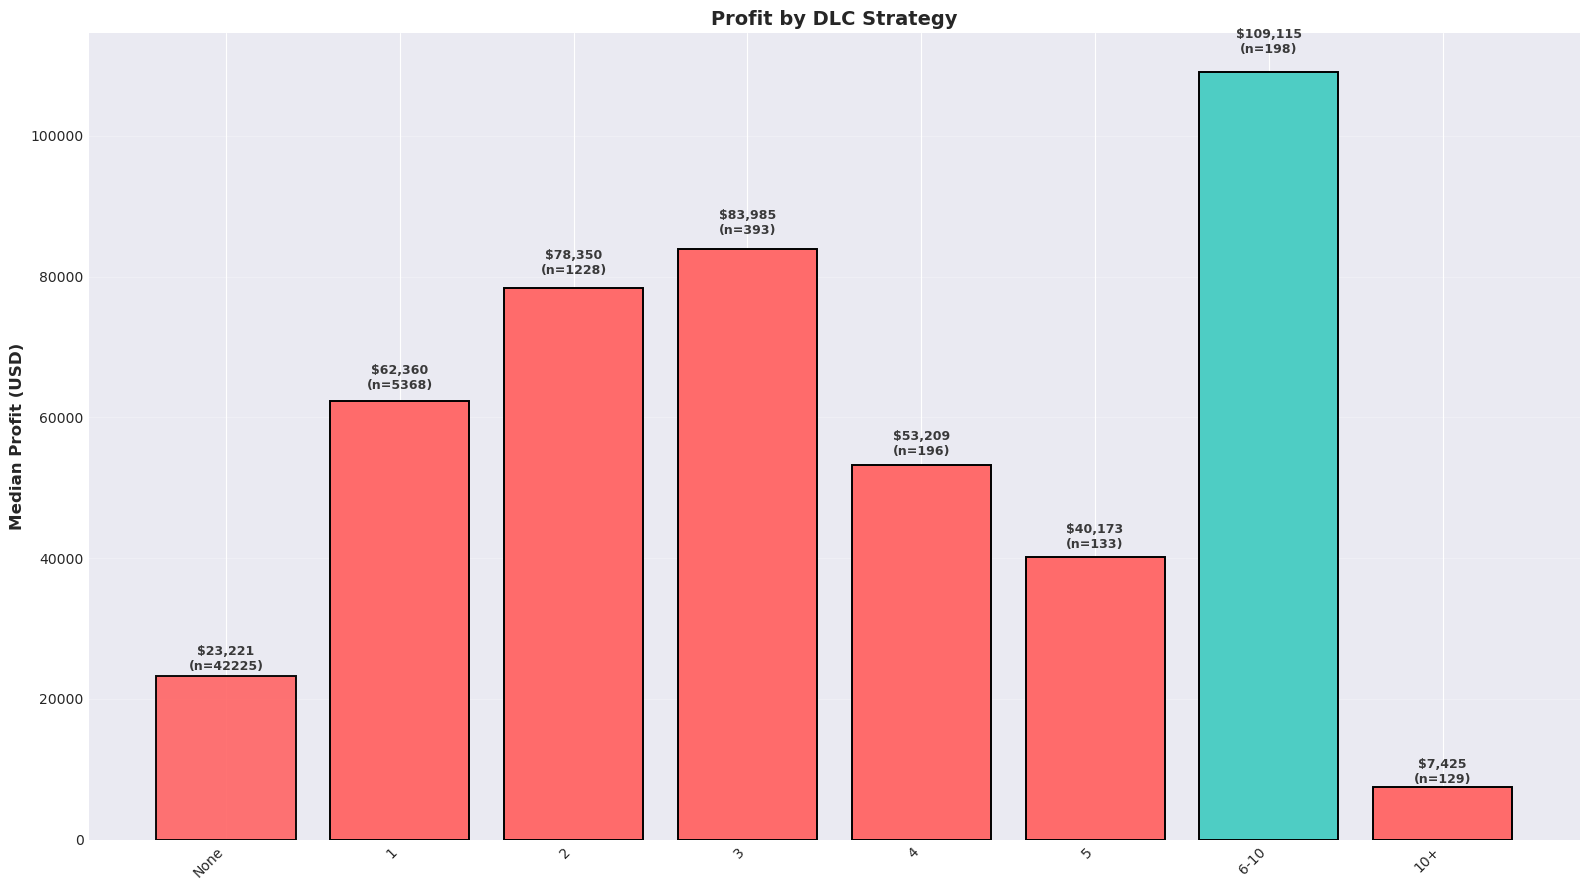

✓ 6-10 DLCs: $109,115 median profit


In [28]:
# =====================================================
# INSIGHT 6: DLC STRATEGY
# =====================================================
print("\n[6/10] PLAN FOR AROUND 3 DLCs")
print("="*80)

# --- global theme ---
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

fig, ax = plt.subplots(figsize=(16, 9))

# DLC brackets
indie_games['dlc_bracket'] = pd.cut(
    indie_games['DLC count'],
    bins=[-1, 0, 1, 2, 3, 4, 5, 10, 100],
    labels=['None', '1', '2', '3', '4', '5', '6-10', '10+']
)

dlc_analysis = indie_games.groupby('dlc_bracket').agg({
    'EstimatedProfit': 'median',
    'Name': 'count'
}).reset_index()

dlc_analysis = dlc_analysis[dlc_analysis['Name'] >= 20]

# Identify highest profit DLC bracket
max_idx = dlc_analysis['EstimatedProfit'].idxmax()

# Coloring scheme
colors = []
alphas = []

for i in range(len(dlc_analysis)):
    if i == max_idx:
        colors.append("#4ECDC4")   # highlight
        alphas.append(0.95)
    else:
        colors.append("#FF6B6B")   # light indie color
        # alphas.append(0.45)

bars = ax.bar(
    range(len(dlc_analysis)),
    dlc_analysis['EstimatedProfit'],
    color=colors,
    edgecolor='black',
    linewidth=1.4
)

# Apply alpha
for bar, a in zip(bars, alphas):
    bar.set_alpha(a)

# Labels & styling
ax.set_xticks(range(len(dlc_analysis)))
ax.set_xticklabels(
    dlc_analysis['dlc_bracket'],
    rotation=45, ha='right'
)

ax.set_ylabel('Median Profit (USD)', fontsize=12, fontweight='bold')
ax.set_title('Profit by DLC Strategy', fontsize=14, fontweight='bold')

ax.grid(True, alpha=0.28, axis='y')

# Text above bars
for i, (bar, profit, count) in enumerate(
        zip(bars, dlc_analysis['EstimatedProfit'], dlc_analysis['Name'])):
    ax.text(
        i, profit + (profit * 0.02),
        f"${profit:,.0f}\n(n={count})",
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold',
        alpha=0.9
    )

plt.tight_layout()
plt.show()

best_dlc = dlc_analysis.loc[max_idx]
print(f"✓ {best_dlc['dlc_bracket']} DLCs: ${best_dlc['EstimatedProfit']:,.0f} median profit")



[7/10] PLAN FOR ONGOING SUPPORT & UPDATES


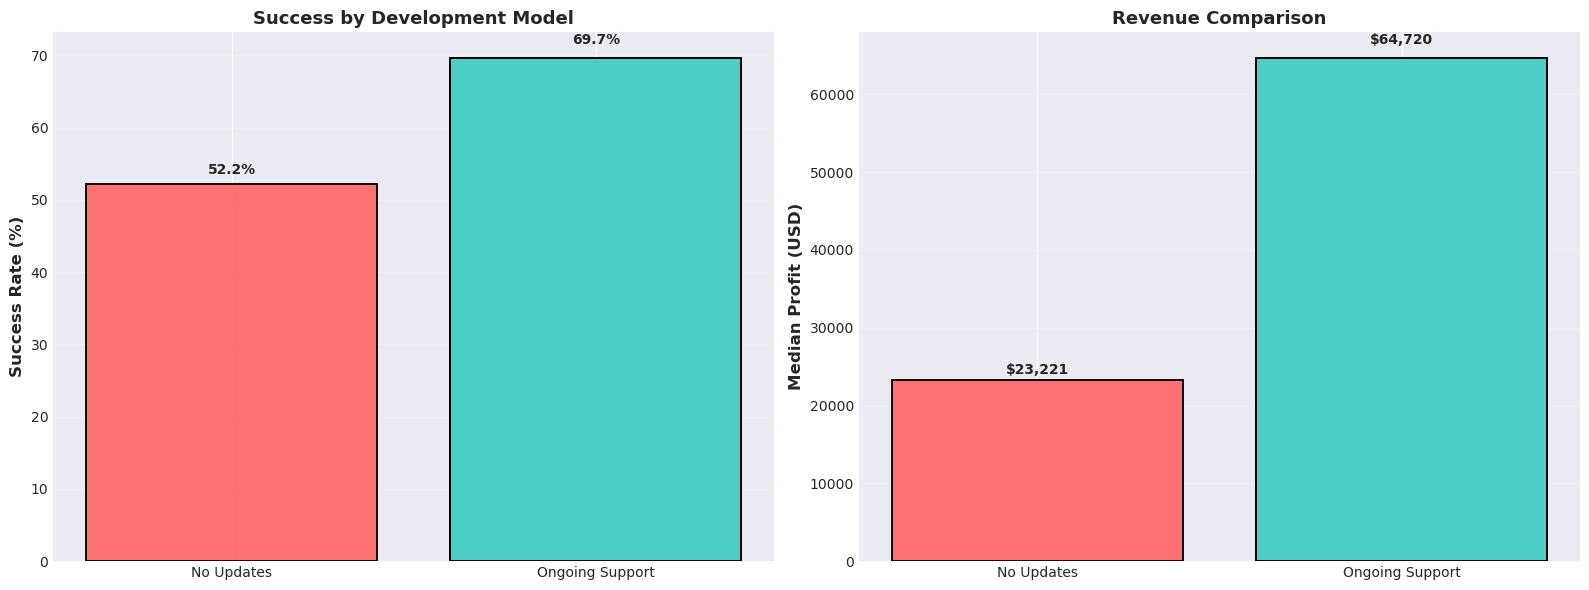

✓ Ongoing support = 179% more revenue


In [29]:
# =====================================================
# INSIGHT 7: ONGOING SUPPORT
# =====================================================
print("\n[7/10] PLAN FOR ONGOING SUPPORT & UPDATES")
print("="*80)

# --- global theme ---
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Binary category: “ongoing support” = has DLC
indie_games['has_ongoing'] = indie_games['DLC count'] > 0

support_comp = indie_games.groupby('has_ongoing').agg({
    'Steam Score': lambda x: ((x >= 0.7).sum() / len(x) * 100),
    'EstimatedProfit': 'median'
}).reset_index()

categories = ['No Updates', 'Ongoing Support']

# Determine which row is "ongoing support"
highlight_idx = support_comp[support_comp['has_ongoing'] == True].index[0]

# Coloring rules
colors = []
alphas = []

for i in range(len(support_comp)):
    if i == highlight_idx:
        colors.append("#4ECDC4")   # highlight
        alphas.append(0.95)
    else:
        colors.append("#FF6B6B")   # muted non-highlight
        # alphas.append(0.45)

# --- SUCCESS RATE PLOT ---
bars1 = ax1.bar(
    categories,
    support_comp['Steam Score'],
    color=colors,
    edgecolor='black',
    linewidth=1.4
)

# Alpha
for bar, a in zip(bars1, alphas):
    bar.set_alpha(a)

ax1.set_ylabel('Success Rate (%)', fontsize=12, fontweight='bold')
ax1.set_title('Success by Development Model', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.28, axis='y')

# Labels
for bar, rate in zip(bars1, support_comp['Steam Score']):
    ax1.text(
        bar.get_x() + bar.get_width()/2.,
        rate + (rate * 0.02),
        f'{rate:.1f}%',
        ha='center',
        va='bottom',
        fontweight='bold'
    )

# --- PROFIT PLOT ---
bars2 = ax2.bar(
    categories,
    support_comp['EstimatedProfit'],
    color=colors,
    edgecolor='black',
    linewidth=1.4
)

for bar, a in zip(bars2, alphas):
    bar.set_alpha(a)

ax2.set_ylabel('Median Profit (USD)', fontsize=12, fontweight='bold')
ax2.set_title('Revenue Comparison', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.28, axis='y')

for bar, profit in zip(bars2, support_comp['EstimatedProfit']):
    ax2.text(
        bar.get_x() + bar.get_width()/2.,
        profit + (profit * 0.02),
        f'${profit:,.0f}',
        ha='center',
        va='bottom',
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

improvement = (support_comp.iloc[highlight_idx]['EstimatedProfit'] /
               support_comp.iloc[0]['EstimatedProfit'] - 1) * 100

print(f"✓ Ongoing support = {improvement:.0f}% more revenue")



[8/10] PRIORITIZE STEAM USER REVIEWS OVER METACRITIC


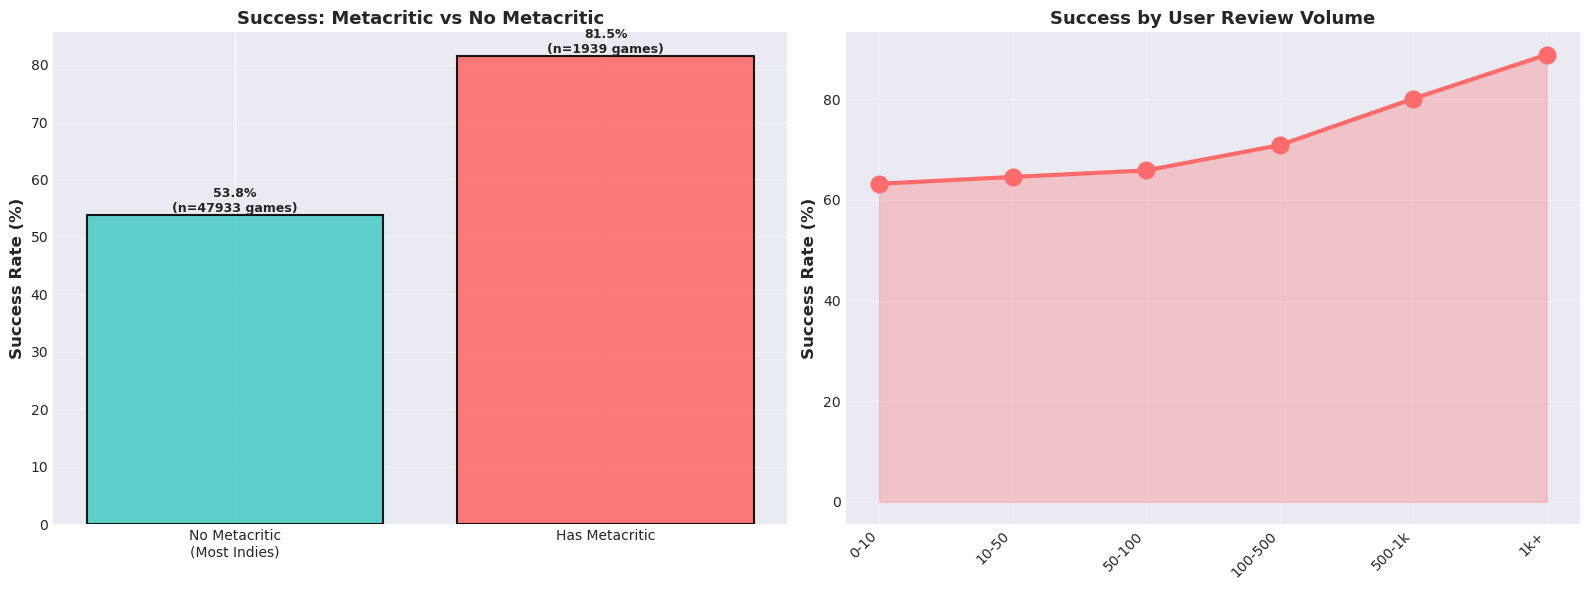

✓ 47933 indie games succeed WITHOUT Metacritic scores
✓ Getting 100+ user reviews early strongly correlates with higher success


In [30]:
# =====================================================
# INSIGHT 8: EARLY REVIEWS MATTER MORE THAN CRITIC SCORES
# =====================================================
print("\n[8/10] PRIORITIZE STEAM USER REVIEWS OVER METACRITIC")
print("="*80)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Theme colors
primary_color = "#FF6B6B"      # main indie color
highlight_color = "#4ECDC4"    # highlight for key bar

# --- Part 1: Metacritic vs no Metacritic ---
indie_games['has_metacritic'] = indie_games['Metacritic score'] > 0
meta_comp = indie_games.groupby('has_metacritic').agg({
    'Steam Score': lambda x: ((x >= 0.7).sum() / len(x) * 100),
    'EstimatedProfit': 'median',
    'Name': 'count'
}).reset_index()

categories = ['No Metacritic\n(Most Indies)', 'Has Metacritic']
bars1 = ax1.bar(categories, meta_comp['Steam Score'], 
                color=[highlight_color, primary_color], 
                edgecolor='black', linewidth=1.5, alpha=0.9)
ax1.set_ylabel('Success Rate (%)', fontsize=12, fontweight='bold')
ax1.set_title('Success: Metacritic vs No Metacritic', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

for bar, rate, count in zip(bars1, meta_comp['Steam Score'], meta_comp['Name']):
    ax1.text(bar.get_x() + bar.get_width()/2., rate,
             f'{rate:.1f}%\n(n={count} games)', ha='center', va='bottom', fontweight='bold', fontsize=9)

# --- Part 2: Review Volume Impact ---
indie_games['review_bracket'] = pd.cut(indie_games['total_reviews'],
                                       bins=[0, 10, 50, 100, 500, 1000, 100000],
                                       labels=['0-10', '10-50', '50-100', '100-500', '500-1k', '1k+'])
review_impact = indie_games.groupby('review_bracket').agg({
    'Steam Score': lambda x: ((x >= 0.7).sum() / len(x) * 100),
    'Name': 'count'
}).reset_index()
review_impact = review_impact[review_impact['Name'] >= 100]

ax2.plot(range(len(review_impact)), review_impact['Steam Score'], marker='o',
         linewidth=3, markersize=12, color=primary_color)
ax2.fill_between(range(len(review_impact)), review_impact['Steam Score'], 
                 alpha=0.3, color=primary_color)
ax2.set_xticks(range(len(review_impact)))
ax2.set_xticklabels(review_impact['review_bracket'], rotation=45, ha='right')
ax2.set_ylabel('Success Rate (%)', fontsize=12, fontweight='bold')
ax2.set_title('Success by User Review Volume', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"✓ {meta_comp.iloc[0]['Name']} indie games succeed WITHOUT Metacritic scores")
print(f"✓ Getting 100+ user reviews early strongly correlates with higher success")



[9/10] DON'T GO FREE-TO-PLAY AS AN INDIE


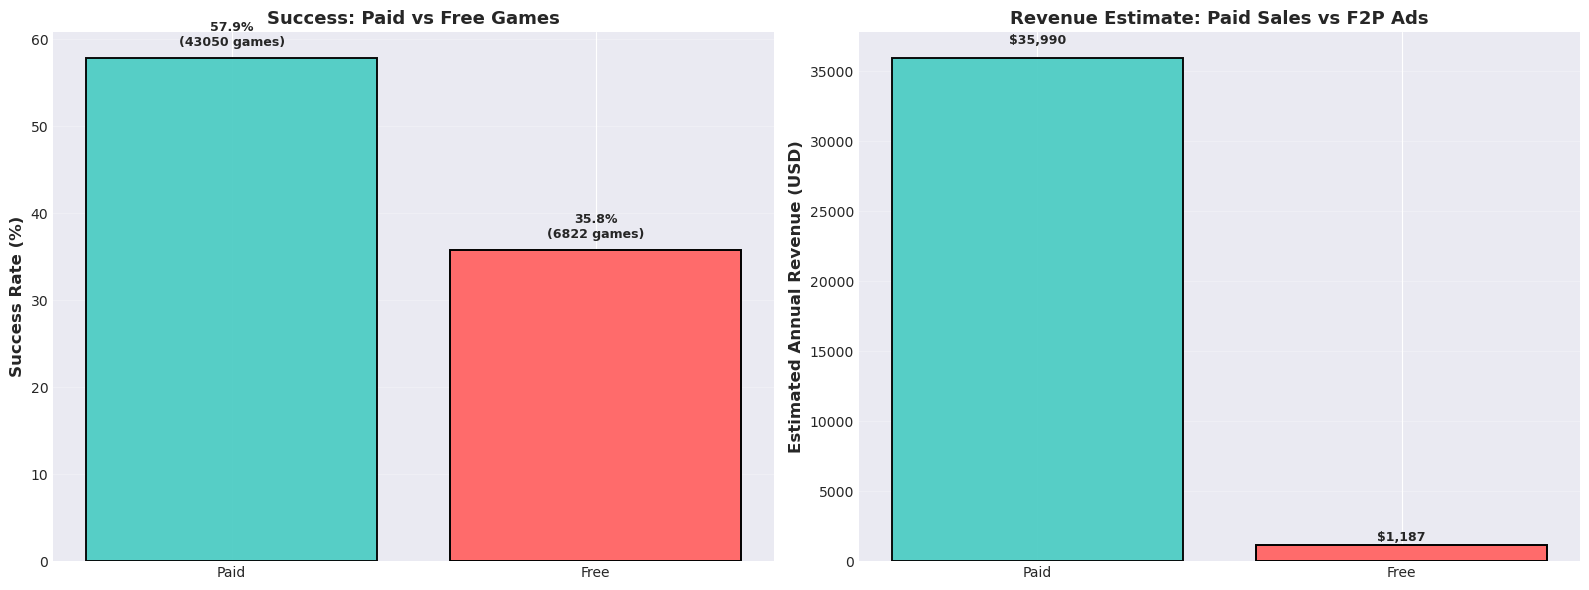

✓ Paid success rate: 57.9% vs 35.8% for free games
✓ Estimated F2P ad revenue ≈ $1187 per game per month
✓ Paid games earn 30.3x more than free games (approx)


In [31]:
# =====================================================
# INSIGHT 9: FREE-TO-PLAY ISN'T THE ANSWER
# =====================================================
print("\n[9/10] DON'T GO FREE-TO-PLAY AS AN INDIE")
print("="*80)

# --- global theme ---
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Aggregate success data
free_comp = indie_games.groupby('is_free').agg({
    'Steam Score': lambda x: ((x >= 0.7).sum() / len(x) * 100),
    'EstimatedProfit': 'median',
    'Estimated owners': 'median',
    'Name': 'count'
}).reset_index()

free_comp.columns = ['is_free', 'Success Rate', 'PaidProfit', 'MedianPlayers', 'Count']
categories = ['Paid', 'Free']

# Identify highlight index (Paid games)
highlight_idx = 0

# Coloring scheme
colors = []
alphas = []
for i in range(len(categories)):
    if i == highlight_idx:
        colors.append("#4ECDC4")  # highlight Paid
        alphas.append(0.95)
    else:
        colors.append("#FF6B6B")  # light Free
        # alphas.append(0.45)

# ---------------------------
# PLOT 1 — SUCCESS RATE
# ---------------------------
bars1 = ax1.bar(
    categories,
    free_comp['Success Rate'],
    color=colors,
    edgecolor='black',
    linewidth=1.4
)

for bar, a in zip(bars1, alphas):
    bar.set_alpha(a)

ax1.set_ylabel('Success Rate (%)', fontsize=12, fontweight='bold')
ax1.set_title('Success: Paid vs Free Games', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.28, axis='y')

for bar, rate, count in zip(bars1, free_comp['Success Rate'], free_comp['Count']):
    ax1.text(
        bar.get_x() + bar.get_width()/2.,
        rate + 1,
        f'{rate:.1f}%\n({count} games)',
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

# ---------------------------
# MODEL F2P AD REVENUE
# ---------------------------
ads_per_player = 30              # avg ads per month
revenue_per_ad = 0.005           # $0.005 per ad

free_comp['F2P_Ad_Revenue'] = (
    free_comp['MedianPlayers'] * ads_per_player * revenue_per_ad
)

# Replace PaidProfit with 0 for Free games for clarity
free_comp.loc[free_comp['is_free'] == 1, 'PaidProfit'] = 0

# ---------------------------
# PLOT 2 — Paid Profit vs F2P Ad Revenue
# ---------------------------
bar_values = [
    free_comp.loc[0, 'PaidProfit'],      # Paid median profit
    free_comp.loc[1, 'F2P_Ad_Revenue']  # Free ad revenue estimate
]

bars2 = ax2.bar(
    categories,
    bar_values,
    color=colors,
    edgecolor='black',
    linewidth=1.4
)

for bar, a in zip(bars2, alphas):
    bar.set_alpha(a)

ax2.set_ylabel('Estimated Annual Revenue (USD)', fontsize=12, fontweight='bold')
ax2.set_title('Revenue Estimate: Paid Sales vs F2P Ads', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.28, axis='y')

for bar, val in zip(bars2, bar_values):
    ax2.text(
        bar.get_x() + bar.get_width()/2.,
        val + (val * 0.02),
        f'${val:,.0f}',
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

print(f"✓ Paid success rate: {free_comp.iloc[0]['Success Rate']:.1f}% vs {free_comp.iloc[1]['Success Rate']:.1f}% for free games")
print(f"✓ Estimated F2P ad revenue ≈ ${free_comp.iloc[1]['F2P_Ad_Revenue']:.0f} per game per month")
print(f"✓ Paid games earn {(free_comp.iloc[0]['PaidProfit']) / (free_comp.iloc[1]['F2P_Ad_Revenue'] + 1):.1f}x more than free games (approx)")



[10/10] THE WINNING FORMULA (AVG PLAYTIME)


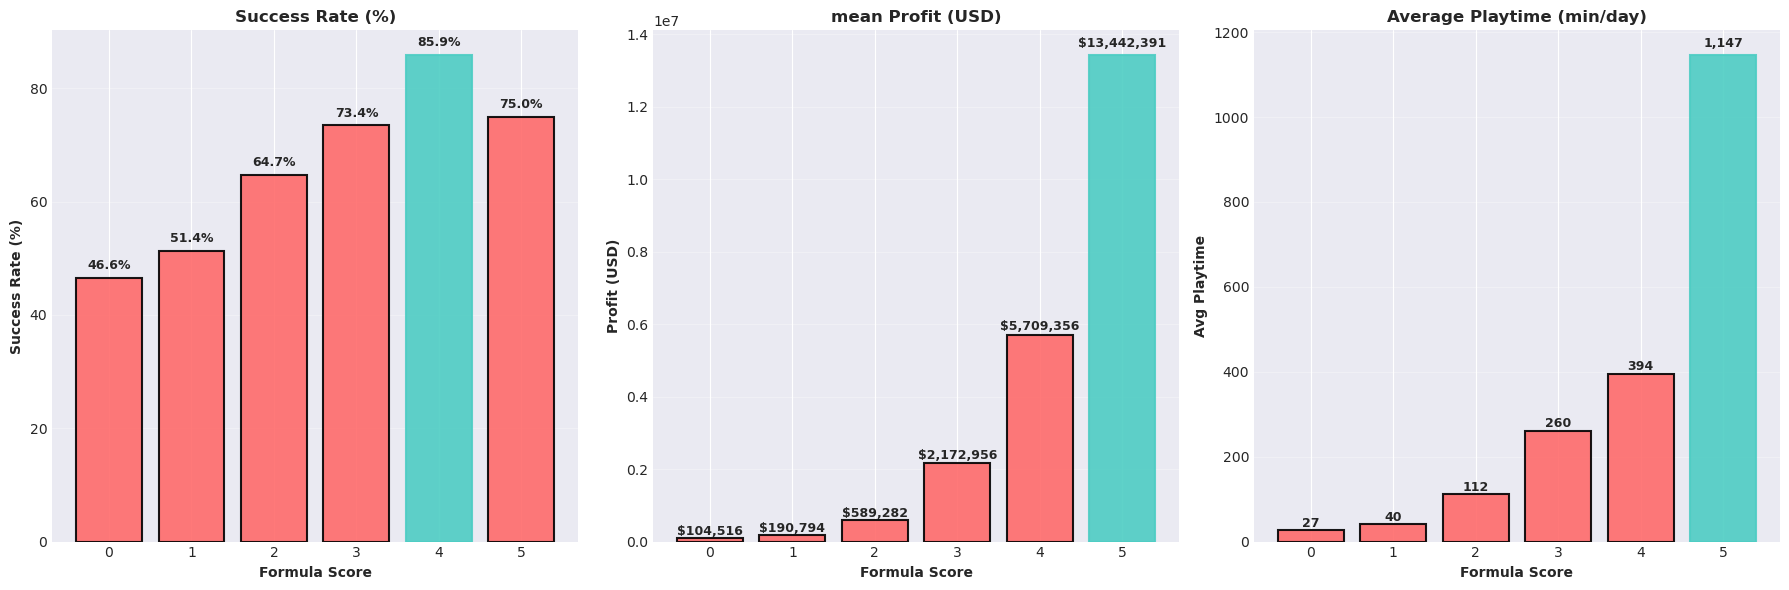

In [32]:
# =====================================================
# INSIGHT 10: THE WINNING FORMULA (AVG PLAYTIME)
# =====================================================
print("\n[10/10] THE WINNING FORMULA (AVG PLAYTIME)")
print("="*80)

# Common colors
primary_color = '#FF6B6B'
highlight_color = '#4ECDC4'

# Ensure release month exists
indie_games['Release date'] = pd.to_datetime(indie_games['Release date'], errors='coerce')
indie_games['Release month'] = indie_games['Release date'].dt.month

# Weighted formula score
cond_price_success = indie_games['Price'].between(20, 30)
cond_price_profit  = indie_games['Price'].between(40, 50)
cond_platforms     = indie_games['platform_count'] >= 2
cond_achievements  = indie_games['Achievements'] >= 20
cond_DLC           = indie_games['DLC count'] == 3
cond_release       = ~indie_games['Release month'].isin([6, 7, 8, 11, 12])

indie_games['formula_score'] = (
    cond_price_success.astype(int) +
    cond_price_profit.astype(int) +
    cond_platforms.astype(int) +
    cond_achievements.astype(int) +
    cond_DLC.astype(int) +
    cond_release.astype(int)
)

# Aggregate metrics
score_comp = indie_games.groupby('formula_score').agg({
    'Steam Score': lambda x: ((x >= 0.7).sum() / len(x) * 100),
    'EstimatedProfit': 'mean',
    'Average playtime forever': 'mean'
}).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# --- Plot 1: Success Rate ---
bars = axes[0].bar(score_comp['formula_score'], score_comp['Steam Score'],
                   color=primary_color, edgecolor='black', linewidth=1.5, alpha=0.9)
bars[score_comp['Steam Score'].idxmax()].set_color(highlight_color)

axes[0].set_title("Success Rate (%)", fontweight='bold')
axes[0].set_xlabel("Formula Score", fontweight='bold')
axes[0].set_ylabel("Success Rate (%)", fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

for bar, val in zip(bars, score_comp['Steam Score']):
    axes[0].text(bar.get_x() + bar.get_width()/2, val + 1, f"{val:.1f}%", ha='center', va='bottom', fontweight='bold', fontsize=9)

# --- Plot 2: Median Profit ---
bars = axes[1].bar(score_comp['formula_score'], score_comp['EstimatedProfit'],
                   color=primary_color, edgecolor='black', linewidth=1.5, alpha=0.9)
bars[score_comp['EstimatedProfit'].idxmax()].set_color(highlight_color)

axes[1].set_title("mean Profit (USD)", fontweight='bold')
axes[1].set_xlabel("Formula Score", fontweight='bold')
axes[1].set_ylabel("Profit (USD)", fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

for bar, val in zip(bars, score_comp['EstimatedProfit']):
    axes[1].text(bar.get_x() + bar.get_width()/2, val + (val*0.01), f"${val:,.0f}", ha='center', va='bottom', fontweight='bold', fontsize=9)

# --- Plot 3: Average Playtime ---
bars = axes[2].bar(score_comp['formula_score'], score_comp['Average playtime forever'],
                   color=primary_color, edgecolor='black', linewidth=1.5, alpha=0.9)
bars[score_comp['Average playtime forever'].idxmax()].set_color(highlight_color)

axes[2].set_title("Average Playtime (min/day)", fontweight='bold')
axes[2].set_xlabel("Formula Score", fontweight='bold')
axes[2].set_ylabel("Avg Playtime", fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='y')

for bar, val in zip(bars, score_comp['Average playtime forever']):
    axes[2].text(bar.get_x() + bar.get_width()/2, val + (val*0.01), f"{val:,.0f}", ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()


# Platforms

In [33]:
con = pd.read_csv('data/vgsales.csv')
steam = df.copy()

In [34]:
# Select only the needed columns from Steam
steam_info = steam[['Name', 'indie']].drop_duplicates(subset='Name')

# Merge into the historical dataset
con_enriched = con.merge(steam_info, on='Name', how='left')

# Fill missing indie values with False
con_enriched['indie'] = con_enriched['indie'].fillna(False)

# Optional: reorder columns for clarity
cols = ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 
        'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 
        'indie']
con_enriched = con_enriched[cols]

# Return the enriched dataframe
con_enriched.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,indie
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,False
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,False
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,False
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,False
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,False


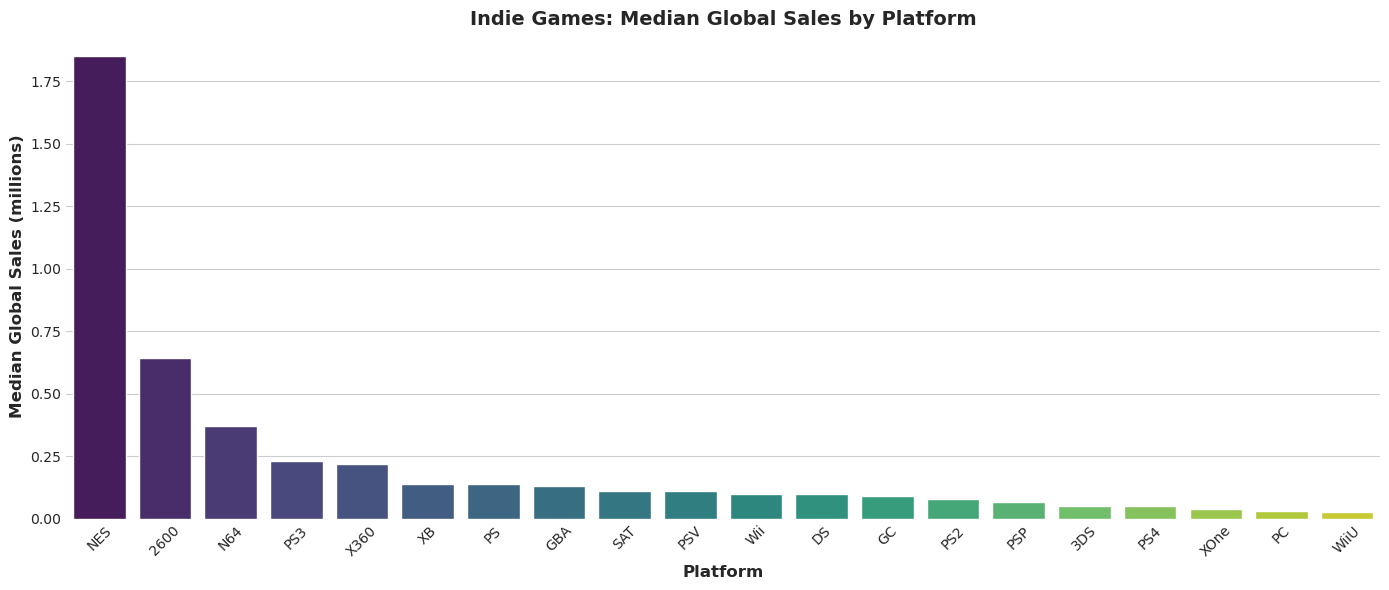

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.size'] = 10

# --- 1. Filter only indie games ---
indie_df = con_enriched[con_enriched['indie'] == True]

# --- 2. Aggregate by platform ---
platform_stats = indie_df.groupby('Platform').agg({
    'Global_Sales': 'median',  # median global sales
    'Name': 'count'            # number of games
}).reset_index()
platform_stats.columns = ['Platform', 'MedianGlobalSales', 'NumGames']

# Sort by MedianGlobalSales descending
platform_stats = platform_stats.sort_values('MedianGlobalSales', ascending=False)

# --- 3. Plot --- 
plt.figure(figsize=(14,6))
sns.barplot(x='Platform', y='MedianGlobalSales', data=platform_stats, palette='viridis')
plt.ylabel('Median Global Sales (millions)', fontsize=12, fontweight='bold')
plt.xlabel('Platform', fontsize=12, fontweight='bold')
plt.title('Indie Games: Median Global Sales by Platform', fontsize=14, fontweight='bold')


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


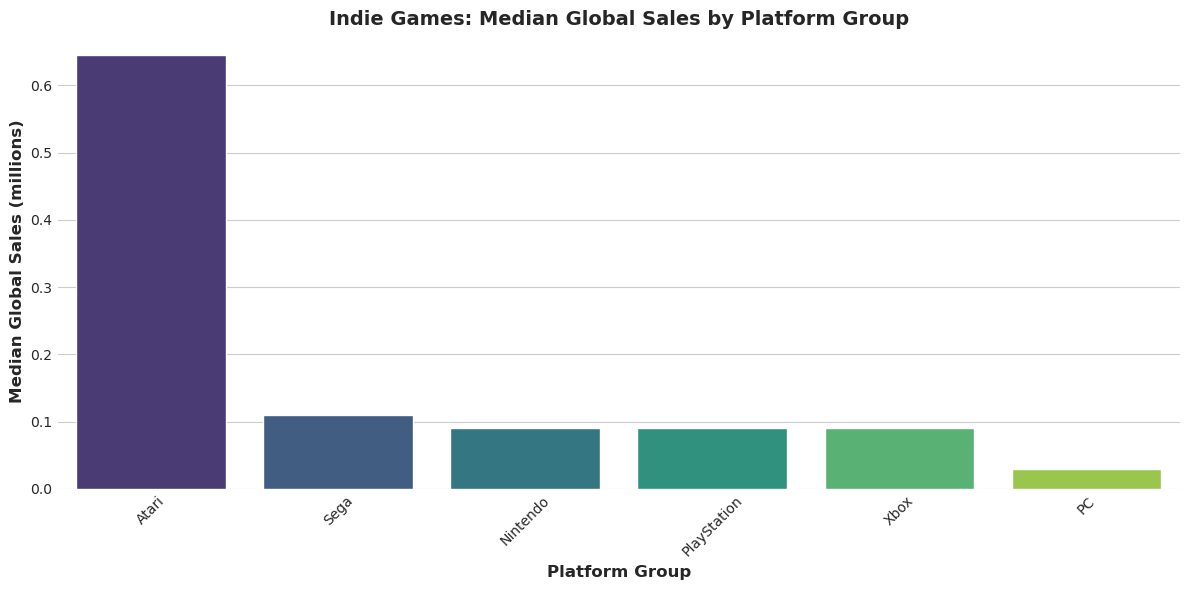

In [36]:
# --- 1. Map historical platforms to general platform groups ---
platform_mapping = {
    # Nintendo
    'Wii': 'Nintendo', 'NES': 'Nintendo', 'GB': 'Nintendo', 'GBA': 'Nintendo',
    'DS': 'Nintendo', '3DS': 'Nintendo', 'WiiU': 'Nintendo', 'GC': 'Nintendo', 'N64': 'Nintendo',
    # PlayStation
    'PS': 'PlayStation', 'PS2': 'PlayStation', 'PS3': 'PlayStation',
    'PS4': 'PlayStation', 'PS5': 'PlayStation', 'PSP': 'PlayStation', 'PSV': 'PlayStation',
    'SAT': 'Sega', 'SCD': 'Sega', 'GEN': 'Sega',
    # Xbox
    'X360': 'Xbox', 'XB': 'Xbox', 'XOne': 'Xbox',
    # PC
    'PC': 'PC', 'PCFX': 'PC',
    # Others
    '2600': 'Atari', '3DO': '3DO', 'WS': 'WonderSwan', 'NG': 'NeoGeo', 'TG16': 'TurboGrafx', 'GG': 'GameGear', 'DC': 'Dreamcast'
}

# Map platforms in the dataset
indie_df['PlatformGroup'] = indie_df['Platform'].map(platform_mapping).fillna('Other')

# --- 2. Aggregate by PlatformGroup ---
platform_group_stats = indie_df.groupby('PlatformGroup').agg({
    'Global_Sales': 'median',
    'Name': 'count'
}).reset_index()
platform_group_stats.columns = ['PlatformGroup', 'MedianGlobalSales', 'NumGames']
platform_group_stats = platform_group_stats.sort_values('MedianGlobalSales', ascending=False)

# --- 3. Plot ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x='PlatformGroup', y='MedianGlobalSales', data=platform_group_stats, palette='viridis')
plt.ylabel('Median Global Sales (millions)', fontsize=12, fontweight='bold')
plt.xlabel('Platform Group', fontsize=12, fontweight='bold')
plt.title('Indie Games: Median Global Sales by Platform Group', fontsize=14, fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


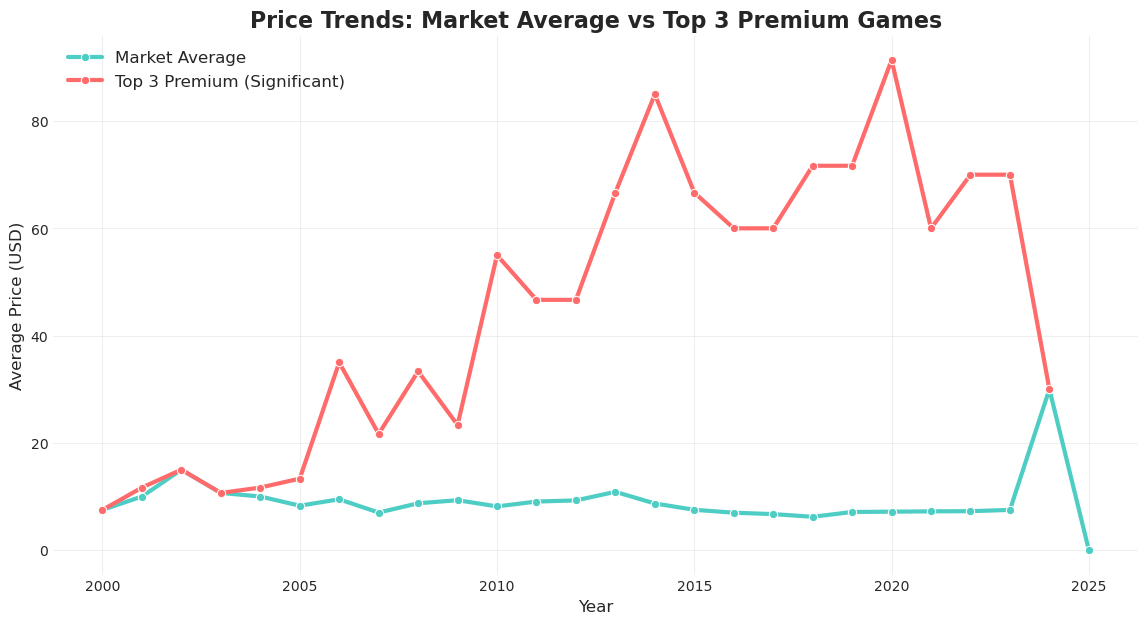

In [37]:
# --- PRICE TRENDS ANALYSIS ---
# Goal: Compare Avg Price of ALL games vs Top 3 Most Expensive "Significant" Games per year

# 1. Filter for significant games (owners > 20k)
sig_df = df[df['Estimated owners'] > 20000].copy()

# 2. Extract Release Year
if 'ReleaseYear' not in df.columns:
    df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')
    df['ReleaseYear'] = df['Release date'].dt.year
    sig_df['ReleaseYear'] = df['ReleaseYear']

# 3. Calculate Trends
years = sorted(df['ReleaseYear'].dropna().unique())
trend_data = []

for year in years:
    if year < 2000: continue # Skip very old years for cleaner chart
    
    # All games avg
    year_all = df[df['ReleaseYear'] == year]
    avg_all = year_all['Price'].mean()
    
    # Top expensive significant games avg
    year_sig = sig_df[sig_df['ReleaseYear'] == year]
    if not year_sig.empty:
        # Top 3 most expensive
        top_expensive = year_sig.nlargest(3, 'Price')
        avg_top = top_expensive['Price'].mean()
    else:
        avg_top = None
        
    trend_data.append({
        'Year': year,
        'Avg Price (All)': avg_all,
        'Avg Price (Top Premium)': avg_top
    })

trend_df = pd.DataFrame(trend_data)

# 4. Plotting
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

# Plot Market Average
sns.lineplot(data=trend_df, x='Year', y='Avg Price (All)', label='Market Average', 
             color='#4ECDC4', linewidth=3, marker='o')

# Plot Premium Average
sns.lineplot(data=trend_df, x='Year', y='Avg Price (Top Premium)', label='Top 3 Premium (Significant)', 
             color='#FF6B6B', linewidth=3, marker='o')

plt.title('Price Trends: Market Average vs Top 3 Premium Games', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Price (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

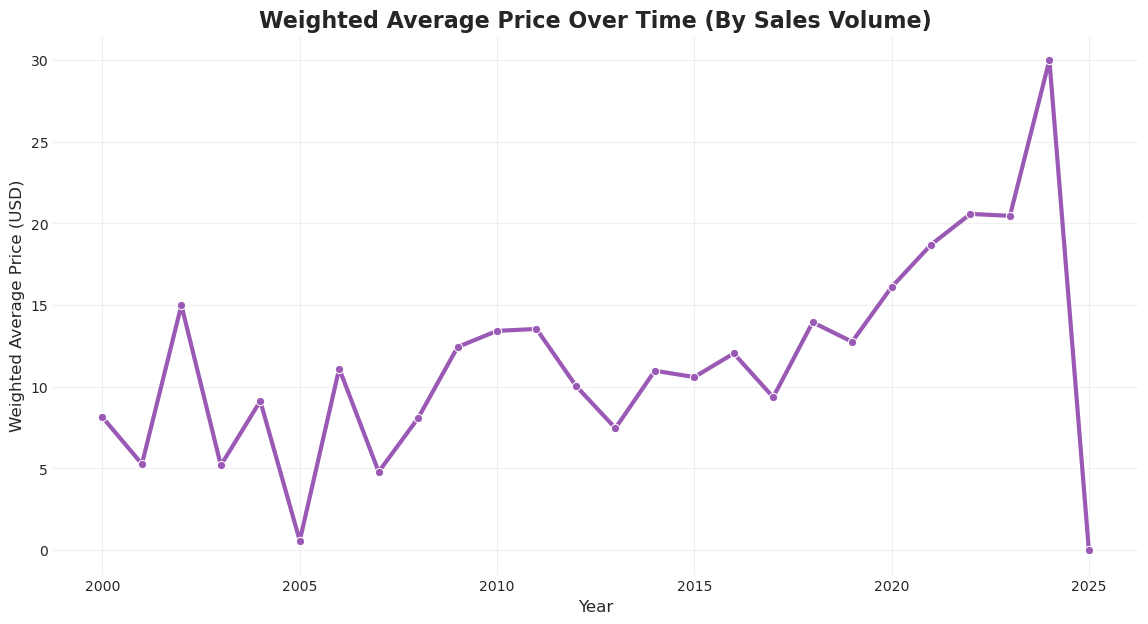

In [38]:
# --- WEIGHTED AVERAGE PRICE ANALYSIS ---
# Goal: Calculate Average Price Weighted by Estimated Owners (Consumer Spending Trend)

# 1. Calculate Weighted Average per Year
years = sorted(df['ReleaseYear'].dropna().unique())
weighted_data = []

for year in years:
    if year < 2000: continue
    
    year_data = df[df['ReleaseYear'] == year]
    if not year_data.empty:
        total_owners = year_data['Estimated owners'].sum()
        if total_owners > 0:
            # Weighted Avg = Sum(Price * Owners) / Sum(Owners)
            weighted_avg = (year_data['Price'] * year_data['Estimated owners']).sum() / total_owners
        else:
            weighted_avg = 0
        
        weighted_data.append({
            'Year': year,
            'Weighted Avg Price': weighted_avg
        })

weighted_df = pd.DataFrame(weighted_data)

# 2. Plotting
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

sns.lineplot(data=weighted_df, x='Year', y='Weighted Avg Price', 
             color='#9b59b6', linewidth=3, marker='o')

plt.title('Weighted Average Price Over Time (By Sales Volume)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Weighted Average Price (USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

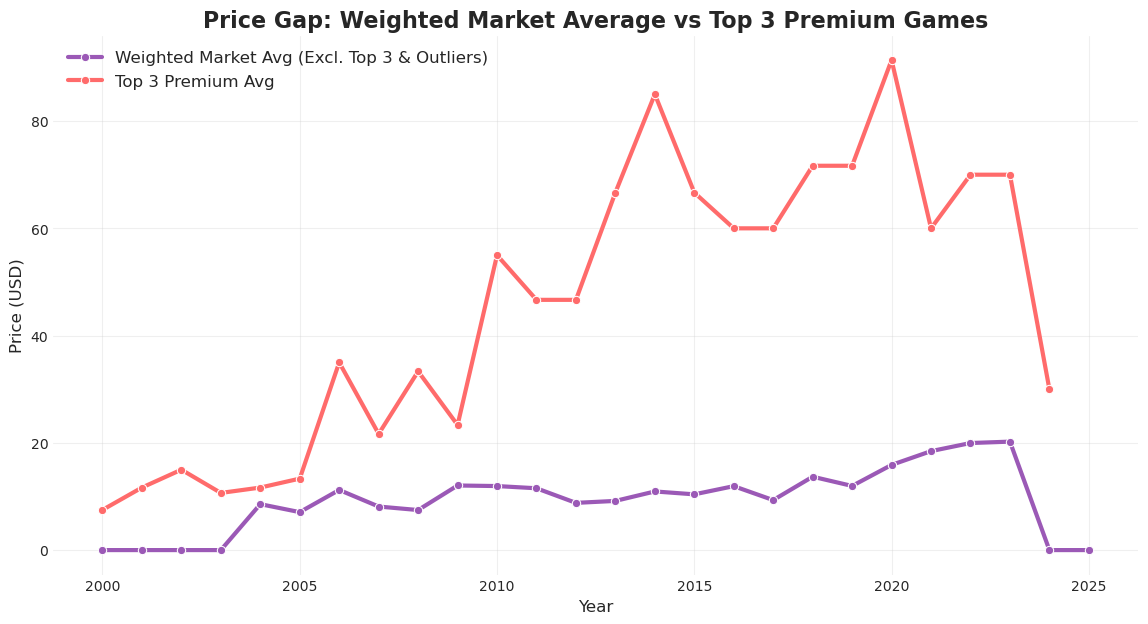

In [39]:
# --- REFINED WEIGHTED PRICE ANALYSIS ---
# Goal: Compare Top 3 Premium Price vs. Weighted Average of the REST of the market
# Exclusions:
# 1. The Top 3 Most Expensive Games themselves.
# 2. "Sales Outliers": Games that account for > 20% of the entire year's sales (to prevent one mega-hit from skewing the avg).

years = sorted(df['ReleaseYear'].dropna().unique())
refined_data = []

SALES_OUTLIER_THRESHOLD = 0.20 # 20%

for year in years:
    if year < 2000: continue
    
    year_data = df[df['ReleaseYear'] == year].copy()
    if year_data.empty: continue
        
    # 1. Identify Top 3 Most Expensive (Significant > 20k owners)
    # We use the same 'significant' filter for identifying the Premium Tier
    year_sig = year_data[year_data['Estimated owners'] > 20000]
    if not year_sig.empty:
        top_3_premium = year_sig.nlargest(3, 'Price')
        avg_premium = top_3_premium['Price'].mean()
        top_3_ids = top_3_premium['AppID'].tolist()
    else:
        avg_premium = None
        top_3_ids = []
        
    # 2. Prepare Data for Weighted Average (The "Market")
    # Exclude Top 3 Premium Games
    market_data = year_data[~year_data['AppID'].isin(top_3_ids)]
    
    # Exclude Sales Outliers
    total_year_owners = year_data['Estimated owners'].sum()
    if total_year_owners > 0:
        # Identify games with > 20% of total share
        market_data = market_data[market_data['Estimated owners'] / total_year_owners <= SALES_OUTLIER_THRESHOLD]
    
    # 3. Calculate Weighted Average of the "Rest"
    market_owners = market_data['Estimated owners'].sum()
    if market_owners > 0:
        weighted_avg = (market_data['Price'] * market_data['Estimated owners']).sum() / market_owners
    else:
        weighted_avg = 0
        
    refined_data.append({
        'Year': year,
        'Refined Weighted Avg (Market)': weighted_avg,
        'Avg Price (Top 3 Premium)': avg_premium
    })

refined_df = pd.DataFrame(refined_data)

# 4. Plotting
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

# Plot Refined Weighted Average
sns.lineplot(data=refined_df, x='Year', y='Refined Weighted Avg (Market)', label='Weighted Market Avg (Excl. Top 3 & Outliers)', 
             color='#9b59b6', linewidth=3, marker='o')

# Plot Premium Average
sns.lineplot(data=refined_df, x='Year', y='Avg Price (Top 3 Premium)', label='Top 3 Premium Avg', 
             color='#FF6B6B', linewidth=3, marker='o')

plt.title('Price Gap: Weighted Market Average vs Top 3 Premium Games', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

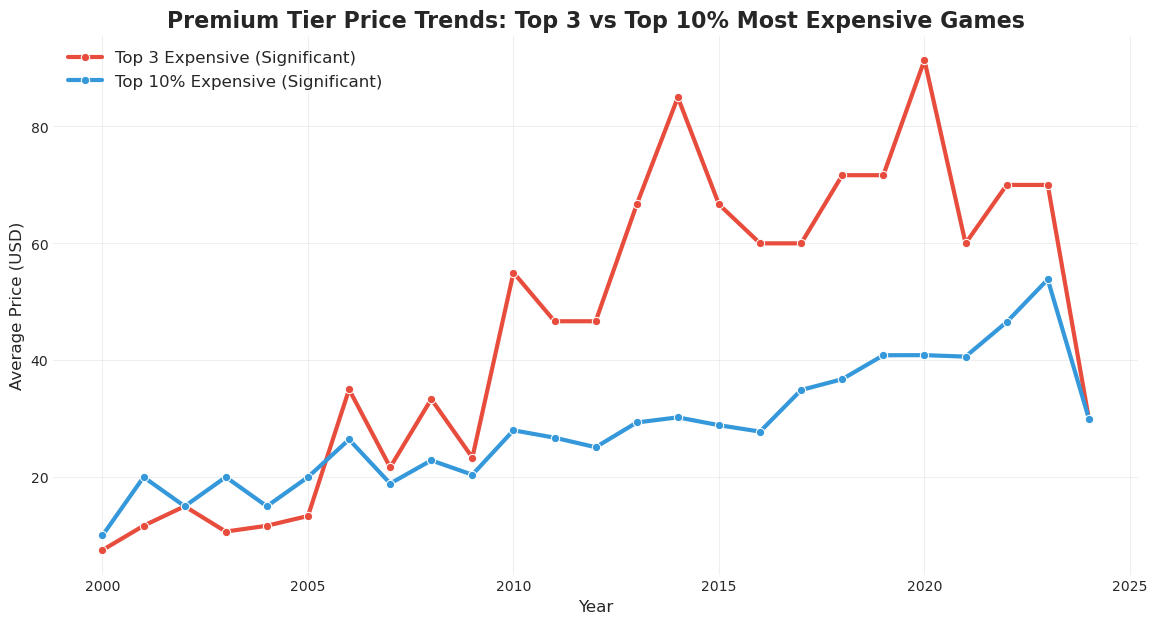

In [40]:
# --- PREMIUM TIER PRICE TRENDS ---
# Goal: Compare Top 3 Most Expensive vs Top 10% Most Expensive Games
# Filters: Significant Games (Owners > 20k) AND Paid Games (Price > 0)

import math

years = sorted(df['ReleaseYear'].dropna().unique())
premium_data = []

for year in years:
    if year < 2000: continue
    
    # Filter for Year, Significant, and Paid
    year_data = df[
        (df['ReleaseYear'] == year) & 
        (df['Estimated owners'] > 20000) & 
        (df['Price'] > 0)
    ].copy()
    
    if year_data.empty: continue
    
    # Sort by Price Descending
    year_data_sorted = year_data.sort_values(by='Price', ascending=False)
    
    # 1. Top 3 Expensive
    top_3_exp = year_data_sorted.head(3)
    avg_top_3 = top_3_exp['Price'].mean()
    
    # 2. Top 10% Expensive
    count = len(year_data_sorted)
    top_10_pct_count = math.ceil(count * 0.10)
    if top_10_pct_count < 1: top_10_pct_count = 1
    
    top_10_pct_exp = year_data_sorted.head(top_10_pct_count)
    avg_top_10_pct = top_10_pct_exp['Price'].mean()
    
    premium_data.append({
        'Year': year,
        'Avg Price (Top 3 Expensive)': avg_top_3,
        'Avg Price (Top 10% Expensive)': avg_top_10_pct
    })

premium_df = pd.DataFrame(premium_data)

# 3. Plotting
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

# Plot Top 3 Expensive
sns.lineplot(data=premium_df, x='Year', y='Avg Price (Top 3 Expensive)', label='Top 3 Expensive (Significant)', 
             color='#e74c3c', linewidth=3, marker='o')

# Plot Top 10% Expensive
sns.lineplot(data=premium_df, x='Year', y='Avg Price (Top 10% Expensive)', label='Top 10% Expensive (Significant)', 
             color='#3498db', linewidth=3, marker='o')

plt.title('Premium Tier Price Trends: Top 3 vs Top 10% Most Expensive Games', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Price (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()